# Irish Ag CA2

Countries chosen for this analysis are Ireland, Germany, Austrailia.

This analysis will focus on the Irish agricultural landscape and the impact that the move towards a more plant based diet has had on it's production/ imports/ exports in comparrison to other counties wehere veganism is also on the rise. 

From the Europe Dataset, the analysis will focus on Ireland, which will be the baseline for all analysis and then Germany. The Irish agriculture findings will then be compared against Germany as both countries benifit from the European Common agricultural Policy. The analysis will be looking for similarities & differences in each countries agriculture indistry. Germany has been chosen as a country for analysis as it is one of the countries with the highest % of vegans in Europe.

The analysis will go on to compare Irish agriculure against  Austraulia, one of the largest vegan populations in the world who do not benifit from being a member of the CAP. 


## Import Initial Libraries 

Import Pandas and Numpy libraries. 

Pandas is a Python library used for data analysis. The Pandas library enables DataFrame and Series functionality used for analyzing the data. This library works with the tabular data, i.e data that is organized in a table with rows(observations) and columns(features). 

NumPy is a Python library used to perform mathematical and computing operations specific to arrays. The NumPy module works with the numerical data.
https://numpy.org/doc/stable/

Seaborn and Matplotlib libraries are used for data visualisation purposes to generate plots, graphs and other visuaisations of data. 

Plotly Express is used for Interactive visalusations 

In [1]:
#data manipulation libraries
import pandas as pd
import numpy as np

# data visualization Libraries
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

## Python Good Practice 
The following are also good practice to run at the start of every Analysis project to ensure the best results 

In [2]:
# filter warnings
import warnings
warnings.filterwarnings("ignore")

# avoid blurry images
%config InLineBackend.figure_format = "retina"
sns.set_context=("talk")

# enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Import Datasets

There is both production and import/export of goods data available on https://www.fao.org/faostat/en/#data/QCL for all continents.

In this section both production and import/export data for Europe, Americas & Oceanias will be imported. Later this data will be go through EDA and data cleaning before moving onto analysis and visualisation. 

Population will also be imported for each country as to standardise analysis to per capita findings. 
Ireland population: https://fred.stlouisfed.org/series/POPTOTIEA647NWDB

In [3]:
#import dataset
europe = pd.read_csv("data\Production_Crops_Livestock_E_Europe_NOFLAG.csv")

europe.head()

Area Code     Area  Item Code      Item  Element Code         Element  \
0          3  Albania        515    Apples          5312  Area harvested   
1          3  Albania        515    Apples          5419           Yield   
2          3  Albania        515    Apples          5510      Production   
3          3  Albania        526  Apricots          5312  Area harvested   
4          3  Albania        526  Apricots          5419           Yield   

     Unit    Y1961   Y1962   Y1963  ...     Y2011     Y2012     Y2013  \
0      ha      NaN     NaN     NaN  ...    3450.0    3719.0    3838.0   
1   hg/ha      NaN     NaN     NaN  ...  185507.0  191718.0  197316.0   
2  tonnes  10004.0  8039.0  7931.0  ...   64000.0   71300.0   75730.0   
3      ha      NaN     NaN     NaN  ...     300.0     301.0     315.0   
4   hg/ha      NaN     NaN     NaN  ...  130000.0  147176.0  139683.0   

      Y2014     Y2015     Y2016     Y2017     Y2018     Y2019     Y2020  
0    3863.0    4008.0    4230.0    4346.0    4294.0    4407.0    4420.0  
1  212426.0  228882.0  240028.0  221671.0  252387.0  240374.0  231147.0  
2   82060.0   91736.0  101532.0   96338.0  108375.0  105933.0  102167.0  
3     320.0     331.0     326.0     326.0     337.0     341.0     346.0  
4  129375.0  152417.0  159325.0  154601.0  152493.0  142962.0  148642.0  

[5 rows x 67 columns]

In [4]:
#import dataset
europe_trade = pd.read_csv("data\Trade_CropsLivestock_E_Europe_NOFLAG.csv")

europe_trade.head()

Area Code     Area  Item Code                      Item  Element Code  \
0          3  Albania        862  Alfalfa meal and pellets          5610   
1          3  Albania        862  Alfalfa meal and pellets          5622   
2          3  Albania        862  Alfalfa meal and pellets          5910   
3          3  Albania        862  Alfalfa meal and pellets          5922   
4          3  Albania        231           Almonds shelled          5610   

           Element      Unit  Y1961  Y1962  Y1963  ...  Y2011  Y2012  Y2013  \
0  Import Quantity    tonnes    NaN    NaN    NaN  ...  290.0    0.0    0.0   
1     Import Value  1000 US$    NaN    NaN    NaN  ...   89.0    0.0    0.0   
2  Export Quantity    tonnes    NaN    NaN    NaN  ...    0.0    0.0    0.0   
3     Export Value  1000 US$    NaN    NaN    NaN  ...    0.0    0.0    0.0   
4  Import Quantity    tonnes    NaN    NaN    NaN  ...  180.0  144.0  126.0   

   Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  Y2020  
0    NaN    NaN    NaN    NaN    NaN    5.0    NaN  
1    NaN    NaN    NaN    NaN    NaN    0.0    NaN  
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
3    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
4   32.0  133.0  129.0   59.0   85.0  512.0  367.0  

[5 rows x 67 columns]

In [5]:
#import dataset
americas = pd.read_csv("data\Production_Crops_Livestock_E_Americas_NOFLAG.csv")

americas.head()

Area Code                 Area  Item Code          Item  Element Code  \
0          8  Antigua and Barbuda       1107         Asses          5111   
1          8  Antigua and Barbuda        486       Bananas          5312   
2          8  Antigua and Barbuda        486       Bananas          5419   
3          8  Antigua and Barbuda        486       Bananas          5510   
4          8  Antigua and Barbuda        414  Beans, green          5312   

          Element    Unit   Y1961   Y1962   Y1963  ...    Y2011    Y2012  \
0          Stocks    Head  2300.0  2300.0  2300.0  ...   1700.0   1700.0   
1  Area harvested      ha     NaN     NaN     NaN  ...     28.0     35.0   
2           Yield   hg/ha     NaN     NaN     NaN  ...  85357.0  71429.0   
3      Production  tonnes     NaN     NaN     NaN  ...    239.0    250.0   
4  Area harvested      ha     1.0     1.0     2.0  ...     24.0     25.0   

     Y2013    Y2014    Y2015    Y2016    Y2017    Y2018    Y2019   Y2020  
0   1700.0   1700.0   1703.0   1707.0   1719.0   1719.0   1723.0  1726.0  
1     32.0     35.0     37.0     41.0     44.0     48.0     52.0    11.0  
2  79688.0  74000.0  71081.0  56341.0  46364.0  37292.0  28846.0  4545.0  
3    255.0    259.0    263.0    231.0    204.0    179.0    150.0     5.0  
4     25.0     25.0     25.0     25.0     26.0     26.0     26.0    26.0  

[5 rows x 67 columns]

In [6]:
#import dataset
americas_trade = pd.read_csv("data\Trade_CropsLivestock_E_Americas_NOFLAG.csv")

americas_trade.head()

Area Code                 Area  Item Code                      Item  \
0          8  Antigua and Barbuda        862  Alfalfa meal and pellets   
1          8  Antigua and Barbuda        862  Alfalfa meal and pellets   
2          8  Antigua and Barbuda        231           Almonds shelled   
3          8  Antigua and Barbuda        231           Almonds shelled   
4          8  Antigua and Barbuda        231           Almonds shelled   

   Element Code          Element      Unit  Y1961  Y1962  Y1963  ...  Y2011  \
0          5610  Import Quantity    tonnes    NaN    NaN    NaN  ...    NaN   
1          5622     Import Value  1000 US$    NaN    NaN    NaN  ...    NaN   
2          5610  Import Quantity    tonnes    NaN    NaN    NaN  ...    NaN   
3          5622     Import Value  1000 US$    NaN    NaN    NaN  ...    NaN   
4          5910  Export Quantity    tonnes    NaN    NaN    NaN  ...    NaN   

   Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  Y2020  
0    NaN    NaN    0.0    0.0    0.0    0.0    0.0    0.0    NaN  
1    NaN    NaN    1.0    1.0    0.0    0.0    0.0    0.0    NaN  
2   36.0    8.0   12.0   16.0   12.0   16.0   16.0   13.0    1.0  
3  145.0   37.0   47.0   46.0   38.0   54.0   59.0   44.0    6.0  
4    NaN    NaN    NaN    NaN    0.0    0.0    NaN    NaN    NaN  

[5 rows x 67 columns]

In [7]:
#import dataset
oceania = pd.read_csv("data\Production_Crops_Livestock_E_Oceania_NOFLAG.csv")

oceania.head()

Area Code       Area  Item Code                              Item  \
0         10  Australia        221               Almonds, with shell   
1         10  Australia        221               Almonds, with shell   
2         10  Australia        221               Almonds, with shell   
3         10  Australia        711  Anise, badian, fennel, coriander   
4         10  Australia        711  Anise, badian, fennel, coriander   

   Element Code         Element    Unit  Y1961  Y1962  Y1963  ...    Y2011  \
0          5312  Area harvested      ha    NaN    NaN    NaN  ...  25666.0   
1          5419           Yield   hg/ha    NaN    NaN    NaN  ...  32300.0   
2          5510      Production  tonnes    NaN    NaN    NaN  ...  82900.0   
3          5312  Area harvested      ha    NaN    NaN    NaN  ...    914.0   
4          5419           Yield   hg/ha    NaN    NaN    NaN  ...  11368.0   

      Y2012     Y2013     Y2014     Y2015     Y2016     Y2017     Y2018  \
0   26058.0   28586.0   28060.0   28190.0   28553.0   29282.0   31361.0   
1   41907.0   56531.0   54337.0   55090.0   61170.0   63513.0   55164.0   
2  109200.0  161600.0  152470.0  155300.0  174660.0  185980.0  173000.0   
3    1015.0    1040.0     989.0     989.0    1006.0     987.0     994.0   
4   11488.0   11548.0   11587.0   11608.0   11581.0   11581.0   11590.0   

      Y2019     Y2020  
0   37903.0   39301.0  
1   55932.0   56458.0  
2  212000.0  221886.0  
3     996.0     992.0  
4   11576.0   11593.0  

[5 rows x 67 columns]

In [8]:
#import dataset
oceania_trade = pd.read_csv("data\Trade_CropsLivestock_E_Oceania_NOFLAG.csv")

oceania_trade.head()

Area Code       Area  Item Code                      Item  Element Code  \
0         10  Australia        862  Alfalfa meal and pellets          5610   
1         10  Australia        862  Alfalfa meal and pellets          5622   
2         10  Australia        862  Alfalfa meal and pellets          5910   
3         10  Australia        862  Alfalfa meal and pellets          5922   
4         10  Australia        231           Almonds shelled          5610   

           Element      Unit  Y1961  Y1962  Y1963  ...    Y2011    Y2012  \
0  Import Quantity    tonnes    0.0    0.0    0.0  ...     12.0      9.0   
1     Import Value  1000 US$    0.0    0.0    0.0  ...     34.0     25.0   
2  Export Quantity    tonnes    0.0    0.0    0.0  ...  85992.0  77026.0   
3     Export Value  1000 US$    0.0    0.0    0.0  ...  25292.0  24082.0   
4  Import Quantity    tonnes    0.0    0.0    0.0  ...   1164.0   2309.0   

     Y2013    Y2014    Y2015    Y2016    Y2017    Y2018    Y2019    Y2020  
0      0.0      1.0     13.0     59.0    109.0    657.0   1003.0      1.0  
1      0.0      4.0     18.0     55.0    149.0    363.0    497.0      9.0  
2  73652.0  97312.0  84691.0  81045.0  72941.0  52186.0  50680.0  40056.0  
3  23972.0  38488.0  27409.0  26811.0  20611.0  16656.0  16107.0  12946.0  
4   2515.0   2056.0   1904.0   2314.0   3061.0   3657.0   2784.0   2436.0  

[5 rows x 67 columns]

In [9]:
# import dataset
ireland_pop = pd.read_csv("data\irelandpop.csv")

columns = [ 'Year', 'Population_Ireland']
ireland_pop.columns = columns

# reformat year
ireland_pop['Year'] = ireland_pop['Year'].str[:4]

# drop year 1960 & 2020 
ireland_pop.drop([0], axis=0, inplace=True)
ireland_pop.drop([60], axis=0, inplace=True)

# cast pop as int 
ireland_pop['Population_Ireland'] = ireland_pop['Population_Ireland'].astype('int')

ireland_pop.tail()

Year  Population_Ireland
55  2015             4701957
56  2016             4755335
57  2017             4807388
58  2018             4867316
59  2019             4934340

In [10]:
#import dataset
germany_pop = pd.read_csv("data\germanypop.csv")

columns = [ 'Year', 'Population_Germany']
germany_pop.columns = columns

#reformat year
germany_pop['Year'] = germany_pop['Year'].str[:4]

#drop year 1960 # drop year 1960 & 2020
germany_pop.drop([0], axis=0, inplace=True)
germany_pop.drop([60], axis=0, inplace=True)

# cast pop as int 
germany_pop['Population_Germany'] = germany_pop['Population_Germany'].astype('int')

germany_pop.tail()

Year  Population_Germany
55  2015            81686611
56  2016            82348669
57  2017            82657002
58  2018            82905782
59  2019            83092962

In [11]:
#import dataset
us_pop = pd.read_csv("data\\americapop.csv")

columns = ['Year', 'Population_US']
us_pop.columns = columns

#reformat year
us_pop['Year'] = us_pop['Year'].str[:4]

#drop year 1960 
us_pop.drop([0], axis=0, inplace=True)

# cast pop as int 
us_pop['Population_US'] = us_pop['Population_US'].astype('int')

us_pop.head()

Year  Population_US
1  1961      183691000
2  1962      186538000
3  1963      189242000
4  1964      191889000
5  1965      194303000

In [12]:
#import dataset
aus_pop = pd.read_csv("data\\australiapop.csv")

columns = [ 'Year', 'Population_Australia']
aus_pop.columns = columns

#reformat year
aus_pop['Year'] = aus_pop['Year'].str[:4]

#drop year 1960 
aus_pop.drop([0], axis=0, inplace=True)

# cast pop as int 
aus_pop['Population_Australia'] = aus_pop['Population_Australia'].astype('int')

aus_pop.head()

Year  Population_Australia
1  1961              10483000
2  1962              10742000
3  1963              10950000
4  1964              11167000
5  1965              11388000

## Europe Production Dataset Initial EDA

The European Prouction Dataset is taken from faostat and contains annual data on all crops and animal products producted in  Europe from 1961-2020, measured in tonnes. It also contains information on livestock numbers, yields, areas havested and slaughtering numbers.

Unit Measurements:

    Production = tonnes / head / 1000 head / number
    Area harvested = ha
    Yield =	hg/ha
    Stocks = head / 1000 head
    Producing Animals / Slaughtered = head / 1000 head
    Yields/ Carcass Weight = 0.1g/An, hg/An
    Milking Animals = head 
    Laying = head / 1000 head
    Prod Popultn (bees/honey) = number

"Crop statistics are recorded for 173 products, covering the following categories: Crops Primary, Fibre Crops Primary, Cereals, Coarse Grain, Citrus Fruit, Fruit, Jute Jute-like Fibres, Oilcakes Equivalent, Oil crops Primary, Pulses, Roots and Tubers, Treenuts and Vegetables and Melons. Data are expressed in terms of area harvested, production quantity and yield. The objective is to comprehensively cover production of all primary crops for all countries and regions in the world. Area and production data on cereals relate to crops harvested for dry grain only. Cereal crops harvested for hay or harvested green for food, feed or silage or used for grazing are therefore excluded. Area data relate to harvested area. Some countries report sown or cultivated area only." https://www.fao.org/faostat/en/#data/QCL

In this section and the European Trade section, Dataset will go through an initial EDA process before comparative analysis can begin. Here, datasets will be cleaned by:

    Removing / renaming / re-order columns where necessary
    Reshaping data into a more usable format
    Identify Missing or NaN Values / address appropriately 
    Ensuring correct dtype is applied for each feature  - as the ony datetime variable being used is 'Year', this can remain as int type. It will not be nescessary to cast to datetime dytpe. 
    


In [13]:
#drop columns not required for analysis
to_drop = ['Area Code','Item Code','Element Code']
europe.drop(to_drop, inplace=True, axis=1)

### Melt Data

The current dataset is difficult to read as it has lots of columns for the different years of data. This dataset can be reshaped using the melt() function 

In [14]:
# melt new dataframe in order to visualise data by street 
europe_melt = pd.melt(europe, id_vars=[ 'Area', 'Item', 'Element', 'Unit'])

# rename columns 
columns = [ 'Country', 'Crop_Livestock', 'Element', 'Unit', 'Year', 'Value']
europe_melt.columns = columns

#remove Y from year
europe_melt['Year'] = europe_melt['Year'].str[1:]

europe_melt.head()

Country Crop_Livestock         Element    Unit  Year    Value
0  Albania         Apples  Area harvested      ha  1961      NaN
1  Albania         Apples           Yield   hg/ha  1961      NaN
2  Albania         Apples      Production  tonnes  1961  10004.0
3  Albania       Apricots  Area harvested      ha  1961      NaN
4  Albania       Apricots           Yield   hg/ha  1961      NaN

In [15]:
# dataframe shape, number of rows/ columns 
europe_melt.shape

(959580, 6)

In [16]:
europe_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959580 entries, 0 to 959579
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country         959580 non-null  object 
 1   Crop_Livestock  959580 non-null  object 
 2   Element         959580 non-null  object 
 3   Unit            959580 non-null  object 
 4   Year            959580 non-null  object 
 5   Value           544700 non-null  float64
dtypes: float64(1), object(5)
memory usage: 43.9+ MB


### Missing Values

Missing values and 0 values look to reflect that there was no production/ harvest/ yield etc. in a given year for a given country for a given crop/livestock. For early years, it is accptable to assume 0/ NaN values reflect that a cuntry had not yet bgan to produce/ trade this item and therefore values remain as NaN. These values can be removed. 

However, this does not seem to be the case for all 0 / NaN values as pending further investigation it looks like quite a lot of items are missing the last 3 years of production data (2018 / 2019 / 2020). This is consistent across all EU data. This data might not have been submitted to official sources and therefore not included in datasets yet due to covid 19 disruptions. Oceania data seems to only be missing 2020 data as a result of Covid disruptions.

Interpolating or replacing this 2020 might not be appropriate as the interpolated data will not be able to account for the disruption caused by Covid on the Agriculture sector for both production & trade. Therefore, this data will be dropped form the analysis. 

2018 / 2019 data should be interpolated, but it will need to be specific to only the last 2 years to ensure data integretity. It is difficult to interpolate data in the format it is currently in as the Crop_Livestock and Year column contain multiple values which would make it harder to specify what exactly to interpolate. To rectify this, Europe data will first be tidied into seperate Ireland/ Germany datasets to make it easier to identify what specific data to interpolate using the iloc replace function as it allows for specificied rows/ values to be amended, thus keeping the earlier years 0 values in tact to reflect true circumstances.  

Finally, ' Value' dtype will only be changed to int only after missing data has been dealt wil in full in 'Ireland Missing Values'  section as this cannot be done when NaN values are present. 


In [17]:
#remove rows with data not available 
europe_melt = europe_melt.loc[europe_melt["Year"] != "2020"]

In [18]:
# number of missing values 
europe_melt.isnull().sum()

Country                0
Crop_Livestock         0
Element                0
Unit                   0
Year                   0
Value             409536
dtype: int64

In [19]:
#check the amount of 0's in each column
europe_melt_sparse = (europe_melt == 0).sum()
europe_melt_sparse

Country              0
Crop_Livestock       0
Element              0
Unit                 0
Year                 0
Value             6871
dtype: int64

## European Trade Dataset EDA

The European Trade Dataset is taken from faostat and contains annual data on all crop/ livestock/ animal product Imports and Exports in Europe from 1961-2020, measured in tonnes and heads. It also contains information on Import and Export values in $1000US.

Import/ Export Quantity Unit Measurements:

    Crops = tonnes
    Livestock = head
    Dairy Products = tonnes
    Meat animal Product = tonnes 

"The food and agricultural trade dataset is collected, processed and disseminated by FAO according to the standard International Merchandise Trade Statistics (IMTS) Methodology. The data is mainly provided by UNSD, Eurostat, and other national authorities as needed. This source data is checked for outliers, trade partner data is used for non-reporting countries or missing cells, and data on food aid is added to take into account total cross-border trade flows."  https://www.fao.org/faostat/en/#data/TCL


In [20]:
#drop columns not required for analysis
europe_trade.drop(to_drop, inplace=True, axis=1)

### Melt Data

In [21]:
# melt new dataframe in order to visualise data by street 
europe_trade_melt = pd.melt(europe_trade, id_vars=[ 'Area', 'Item', 'Element', 'Unit'])

# rename columns 
columns = [ 'Country', 'Crop_Livestock', 'Element', 'Unit', 'Year', 'Value']
europe_trade_melt.columns = columns

#remove Y from year
europe_trade_melt['Year'] = europe_trade_melt['Year'].str[1:]

europe_trade_melt.head()

Country            Crop_Livestock          Element      Unit  Year  Value
0  Albania  Alfalfa meal and pellets  Import Quantity    tonnes  1961    NaN
1  Albania  Alfalfa meal and pellets     Import Value  1000 US$  1961    NaN
2  Albania  Alfalfa meal and pellets  Export Quantity    tonnes  1961    NaN
3  Albania  Alfalfa meal and pellets     Export Value  1000 US$  1961    NaN
4  Albania           Almonds shelled  Import Quantity    tonnes  1961    NaN

In [22]:
# dataframe shape, number of rows/ columns 
europe_trade_melt.shape

(4092480, 6)

In [23]:
europe_trade_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092480 entries, 0 to 4092479
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Country         object 
 1   Crop_Livestock  object 
 2   Element         object 
 3   Unit            object 
 4   Year            object 
 5   Value           float64
dtypes: float64(1), object(5)
memory usage: 187.3+ MB


### Missing Values

Unlike for the Europoean Production data, European and Oceania Trade data is not missing large amounts of data as a result of covid disruption. Meaning, any missing data identified here either relates to years there was no imports/exports for a given country for a given crop/livestock. 

For early years, it is accptable to assume 0/ NaN values reflect that a country had not yet began to produce/ trade this item and therefore values remain as NaN and can be removed. Any other Nan/ 0's identified are likely to reflect other years where no trade took place for the given product. 

As such, any missing data will just be removed for European & Oceanic Trade datasets. 

In [24]:
#remove rows with data not available 
europe_trade_melt = europe_trade_melt.loc[europe_trade_melt["Year"] != "2020"]

In [25]:
# number of missing values 
europe_trade_melt.isnull().sum()

Country                 0
Crop_Livestock          0
Element                 0
Unit                    0
Year                    0
Value             1533613
dtype: int64

In [26]:
#check the amount of 0's in each column
europe_trade_melt_sparse = (europe_trade_melt == 0).sum()
europe_trade_melt_sparse

Country                0
Crop_Livestock         0
Element                0
Unit                   0
Year                   0
Value             494020
dtype: int64

In [27]:
# drop all rows with NaN and 0 values

# first will replace 0 values with NaNs  
europe_trade_melt.replace(to_replace = 0, value = np.nan, inplace=True)

# row = 0, column = 1
europe_trade_df = europe_trade_melt.dropna(axis=0)

# check if we have any NaN values in our dataset
europe_trade_df.isnull().values.any()

False

In [28]:
europe_trade_df.shape

(1996639, 6)

## IRELAND

Ireland will form as the baseline country for analysis. 

This analysis will focus on how irish production and consumption has changed over time in line with consumer diet trends and thus impacted irelands agriculture. For the sake of this analysis, Irish production is specific on meat, dairy and crops. Livestock data will not be included in this analysis and will be filtered out by specifying the ireland_prod datafame to only contain 'Production' for element. Livesotck is measured in 'head' and '1000 head' so will remove any livestock data. 

Population data will be added as to calculate values per capita for later comparrison with other countries. 

In order to calculate consumption of a product; production, export and import data on a particular crop is required.
Ireland Trade data will be sorted into 'Import Quantity / Import Value / Export Quantity/ Export Value' and brought into the Ireand dataset using a merge function.

Seperate datasets can be used to conduct specific analysis on Meat, dairy and crop products using the str.contains function. 

Once cleaned, descriptive statistics will then be used for statistical analysis on datasets. It is important to note that the Crop_Livestock column contains multiple products that vary in production level. As it would not be useful to see the mean/diveations until this column is divided up further so an average meat production figure or average dairy production figure can be shown. 

After analysing the descriptive statistics, iusal representations will be used to display initial data to the reader

## Ireland Production Dataset 

For the sake of this analysis, Irish production is specific on meat, dairy and crops. Livestock data will not be included in this analysis and will be filtered out by specifying the ireland_prod datafame to only contain 'Production' for element. Livesotck is measured in 'head' and '1000 head' so will remove any livestock data. 

Columns will also be renamed to 'Production' specific values to make it easier to identify what columns can be dropped when merging with trade datasets later on. 

Missing Values will then be adressed for Ireland dataset. 

The shape function will show how many rows are present. This number is expected to drop once merged with trade data as only rows that have all elements related to consumption (import/ export/ production data) will be kept. 


In [29]:
# create irish dataset
ireland_prod_df = europe_melt.loc[europe_melt['Country']=='Ireland']

# irish production dataset - all products (crop, meat, livestock)
ireland_prod = ireland_prod_df.loc[ireland_prod_df['Element']=='Production']

# rename columns
ireland_prod.rename(columns={'Country': 'Prod Country', 'Unit': 'Production Unit', 'Value': 'Production Value' }, inplace=True)

#reset index
ireland_prod.reset_index(drop=True, inplace=True)

ireland_prod

Prod Country            Crop_Livestock     Element Production Unit  Year  \
0         Ireland       Almonds, with shell  Production          tonnes  1961   
1         Ireland                    Apples  Production          tonnes  1961   
2         Ireland                  Apricots  Production          tonnes  1961   
3         Ireland                  Avocados  Production          tonnes  1961   
4         Ireland                   Bananas  Production          tonnes  1961   
...           ...                       ...         ...             ...   ...   
8432      Ireland       Sheep and Goat Meat  Production          tonnes  2019   
8433      Ireland  Skim Milk&Buttermilk,Dry  Production          tonnes  2019   
8434      Ireland       Sugar Crops Primary  Production          tonnes  2019   
8435      Ireland           Treenuts, Total  Production          tonnes  2019   
8436      Ireland        Vegetables Primary  Production          tonnes  2019   

      Production Value  
0                  NaN  
1              29000.0  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
8432           66040.0  
8433          134300.0  
8434               0.0  
8435               0.0  
8436          184810.0  

[8437 rows x 6 columns]

In [30]:
ireland_prod.shape

(8437, 6)

### Ireland Missing Values

Missing values for European data have been reviewed previously. NaN and 0 values look to reflect that there was no production/ harvest/ yield etc. in a given year for a given country for a given crop/livestock. For early years, it is accptable to assume 0/ NaN values reflect that a cuntry had not yet bgan to produce/ trade this item and therefore values remain as NaN. These values can be removed.

2018 / 2019 data should be interpolated. It is difficult to interpolate data in the format it is currently in as the Crop_Livestock and Year column contain multiple values which would make it harder to specify what exactly to interpolate. 

To rectify this, Ireland data will converted into a pivot_table to make it easier to identify what specific columns of data need to be interpolated. Using the loc function to identify row / colun indexes first, the iloc replace function can then be used to replace specific 2018/2019 values.

' Value' dtype will be changed to int once this missing values process is complete. 

In [31]:
#ireland_prod as a pivot table to see what values we need to replace for 2018/2019 only

ireland_prod_table = pd.pivot_table(ireland_prod, values='Production Value', index=['Prod Country', 'Element', 'Production Unit', 'Year'],
                    columns=['Crop_Livestock'], aggfunc=np.sum, fill_value=0)
ireland_prod_table

Crop_Livestock                                Almonds, with shell  Apples  \
Prod Country Element    Production Unit Year                                
Ireland      Production 1000 No         1961                    0       0   
                                        1962                    0       0   
                                        1963                    0       0   
                                        1964                    0       0   
                                        1965                    0       0   
...                                                           ...     ...   
                        tonnes          2015                    0   18800   
                                        2016                    0   21800   
                                        2017                    0   21369   
                                        2018                    0   20140   
                                        2019                    0   19880   

Crop_Livestock                                Apricots  Avocados  Bananas  \
Prod Country Element    Production Unit Year                                
Ireland      Production 1000 No         1961         0         0        0   
                                        1962         0         0        0   
                                        1963         0         0        0   
                                        1964         0         0        0   
                                        1965         0         0        0   
...                                                ...       ...      ...   
                        tonnes          2015         0         0        0   
                                        2016         0         0        0   
                                        2017         0         0        0   
                                        2018         0         0        0   
                                        2019         0         0        0   

Crop_Livestock                                 Barley  Beans, dry  \
Prod Country Element    Production Unit Year                        
Ireland      Production 1000 No         1961        0           0   
                                        1962        0           0   
                                        1963        0           0   
                                        1964        0           0   
                                        1965        0           0   
...                                               ...         ...   
                        tonnes          2015  1739200           0   
                                        2016  1479900           0   
                                        2017  1505811           0   
                                        2018  1181560           0   
                                        2019  1479600           0   

Crop_Livestock                                Beans, green  \
Prod Country Element    Production Unit Year                 
Ireland      Production 1000 No         1961             0   
                                        1962             0   
                                        1963             0   
                                        1964             0   
                                        1965             0   
...                                                    ...   
                        tonnes          2015          1679   
                                        2016          1706   
                                        2017          1702   
                                        2018             0   
                                        2019             0   

Crop_Livestock                                Beef and Buffalo Meat  \
Prod Country Element    Production Unit Year                          
Ireland      Production 1000 No         1961                      0   
                                        1962                      0   
       

In [32]:
# search tab to identify what 2018/2019 data to be replaces & identify iloc 
ireland_prod.loc[ireland_prod['Crop_Livestock']=='Cream fresh']

Prod Country Crop_Livestock     Element Production Unit  Year  \
22        Ireland    Cream fresh  Production          tonnes  1961   
165       Ireland    Cream fresh  Production          tonnes  1962   
308       Ireland    Cream fresh  Production          tonnes  1963   
451       Ireland    Cream fresh  Production          tonnes  1964   
594       Ireland    Cream fresh  Production          tonnes  1965   
737       Ireland    Cream fresh  Production          tonnes  1966   
880       Ireland    Cream fresh  Production          tonnes  1967   
1023      Ireland    Cream fresh  Production          tonnes  1968   
1166      Ireland    Cream fresh  Production          tonnes  1969   
1309      Ireland    Cream fresh  Production          tonnes  1970   
1452      Ireland    Cream fresh  Production          tonnes  1971   
1595      Ireland    Cream fresh  Production          tonnes  1972   
1738      Ireland    Cream fresh  Production          tonnes  1973   
1881      Ireland    Cream fresh  Production          tonnes  1974   
2024      Ireland    Cream fresh  Production          tonnes  1975   
2167      Ireland    Cream fresh  Production          tonnes  1976   
2310      Ireland    Cream fresh  Production          tonnes  1977   
2453      Ireland    Cream fresh  Production          tonnes  1978   
2596      Ireland    Cream fresh  Production          tonnes  1979   
2739      Ireland    Cream fresh  Production          tonnes  1980   
2882      Ireland    Cream fresh  Production          tonnes  1981   
3025      Ireland    Cream fresh  Production          tonnes  1982   
3168      Ireland    Cream fresh  Production          tonnes  1983   
3311      Ireland    Cream fresh  Production          tonnes  1984   
3454      Ireland    Cream fresh  Production          tonnes  1985   
3597      Ireland    Cream fresh  Production          tonnes  1986   
3740      Ireland    Cream fresh  Production          tonnes  1987   
3883      Ireland    Cream fresh  Production          tonnes  1988   
4026      Ireland    Cream fresh  Production          tonnes  1989   
4169      Ireland    Cream fresh  Production          tonnes  1990   
4312      Ireland    Cream fresh  Production          tonnes  1991   
4455      Ireland    Cream fresh  Production          tonnes  1992   
4598      Ireland    Cream fresh  Production          tonnes  1993   
4741      Ireland    Cream fresh  Production          tonnes  1994   
4884      Ireland    Cream fresh  Production          tonnes  1995   
5027      Ireland    Cream fresh  Production          tonnes  1996   
5170      Ireland    Cream fresh  Production          tonnes  1997   
5313      Ireland    Cream fresh  Production          tonnes  1998   
5456      Ireland    Cream fresh  Production          tonnes  1999   
5599      Ireland    Cream fresh  Production          tonnes  2000   
5742      Ireland    Cream fresh  Production          tonnes  2001   
5885      Ireland    Cream fresh  Production          tonnes  2002   
6028      Ireland    Cream fresh  Production          tonnes  2003   
6171      Ireland    Cream fresh  Production          tonnes  2004   
6314      Ireland    Cream fresh  Production          tonnes  2005   
6457      Ireland    Cream fresh  Production          tonnes  2006   
6600      Ireland    Cream fresh  Production          tonnes  2007   
6743      Ireland    Cream fresh  Production          tonnes  2008   
6886      Ireland    Cream fresh  Production          tonnes  2009   
7029      Ireland    Cream fresh  Production          tonnes  2010   
7172      Ireland    Cream fresh  Production          tonnes  2011   
7315      Ireland    Cream fresh  Production          tonnes  2012   
7458      Ireland    Cream fresh  Production          tonnes  2013   
7601      Ireland    Cream fresh  Production          tonnes  2014   
7744      Ireland    Cream fresh  Production          tonnes  2015   
7887      Ireland    Cream fresh  Production          tonnes  2016   
8030      Irela

In [33]:
# replace missing 2018/ 2019 values with last recorded value 

ireland_prod.iloc[[8203, 8346],[5]] = 2696.0
ireland_prod.iloc[[8206, 8349],[5]] = 3463.0
ireland_prod.iloc[[8208, 8351],[5]] = 1222.0
ireland_prod.iloc[[8209, 8352],[5]] = 3279.0
ireland_prod.iloc[[8168, 8311],[5]] = 4435.0
ireland_prod.iloc[[8214, 8357],[5]] = 4706000.0
ireland_prod.iloc[[8217, 8360],[5]] = 57170.0
ireland_prod.iloc[[8158, 8301],[5]] = 1702.0
ireland_prod.iloc[[8160, 8303],[5]] = 199.0
ireland_prod.iloc[[8167, 8310],[5]] = 1478.0
ireland_prod.iloc[[8168, 8311],[5]] = 4435.0
ireland_prod.iloc[[8171, 8314],[5]] = 340.0
ireland_prod.iloc[[8184, 8327],[5]] = 8906.0
ireland_prod.iloc[[8193, 8336],[5]] = 268.0
ireland_prod.iloc[[8194, 8337],[5]] = 45.0
ireland_prod.iloc[[8223, 8336],[5]] = 2890.0
ireland_prod.iloc[[8236, 8379],[5]] = 7169.0
ireland_prod.iloc[[8244, 8387],[5]] = 1855.0
ireland_prod.iloc[[8252, 8395],[5]] = 629.0
ireland_prod.iloc[[8258, 8401],[5]] = 75000.0
ireland_prod.iloc[[8259, 8402],[5]] = 9755.0
ireland_prod.iloc[[8266, 8409],[5]] = 26516.0
ireland_prod.iloc[[8267, 8410],[5]] = 2.0
ireland_prod.iloc[[8271, 8414],[5]] = 2219.0
ireland_prod.iloc[[8272, 8415],[5]] = 41849.0
ireland_prod.iloc[[8291, 8434],[5]] = 75000.0
ireland_prod.iloc[[8173, 8316],[5]] = 30064.0


In [34]:
# drop all rows with NaN and 0 values

# first will replace 0 values with NaNs  
ireland_prod.replace(to_replace = 0, value = np.nan, inplace=True)

# row = 0, column = 1
ireland_prod = ireland_prod.dropna(axis=0)

# check if we have any NaN values in our dataset
ireland_prod.isnull().values.any()

False

In [35]:
# cast value as int 
ireland_prod['Production Value'] = ireland_prod['Production Value'].astype('int')

### Ireland Production- Add Population 

Population data will be added as to calculate values per capita for later comparrison with other countries. Per Capita amounts will be added during feature Engineering later on. 

In [36]:
# merge population data. Outer merge so no data is lost 

ireland_prod_pop = pd.merge(ireland_prod, ireland_pop, how="outer", on = ["Year"])
ireland_prod_pop.head()

Prod Country    Crop_Livestock     Element Production Unit  Year  \
0      Ireland            Apples  Production          tonnes  1961   
1      Ireland            Barley  Production          tonnes  1961   
2      Ireland    Beer of barley  Production          tonnes  1961   
3      Ireland       Berries nes  Production          tonnes  1961   
4      Ireland  Butter, cow milk  Production          tonnes  1961   

   Production Value  Population_Ireland  
0             29000             2824400  
1            515400             2824400  
2            363000             2824400  
3              1000             2824400  
4             61300             2824400

In [37]:
ireland_prod_pop.shape

(4757, 7)

### Ireland Production Analysis

As the focus of this analysis is how irish production and consumption has changed over time in line with consumer diet trends and thus impacted irelands agriculture, the ireland_df can be divided into Meat / Dairy / Crop datasets for further analysis. This will be done by using the str.contains function to specify what products should be included in each dataset.

The .unique and loc functions will then be used to further filter each dataset and remove any unwanted/ non relevant  products from each dataset. 

In [38]:
# irish production meat products
ireland_prod_meat = ireland_prod_pop.loc[ireland_prod_pop['Crop_Livestock'].str.contains('meat', case=False)]
ireland_prod_meat.rename(columns={'Crop_Livestock': 'Meat Type'}, inplace=True)
ireland_prod_meat.reset_index(drop=True)

# irish production dairy products
ireland_prod_dairy = ireland_prod_pop.loc[ireland_prod_pop['Crop_Livestock'].str.contains('milk', case=False)]
ireland_prod_dairy.rename(columns={'Crop_Livestock': 'Dairy Product'}, inplace=True)
ireland_prod_dairy.reset_index(drop=True)

# irish production crops
ireland_prod_crop = ireland_prod_pop.loc[ireland_prod_pop['Crop_Livestock'].str.contains('meat', case=False) == False]
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop_Livestock'].str.contains('milk', case=False) == False]
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop_Livestock'].str.contains('offals', case=False) == False]
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop_Livestock'].str.contains('fat', case=False) == False]
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop_Livestock'].str.contains('hides', case=False) == False]
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop_Livestock'].str.contains('wool', case=False) == False]
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop_Livestock'].str.contains('skin', case=False) == False]
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop_Livestock'].str.contains('cream', case=False) == False]
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop_Livestock'].str.contains('egg', case=False) == False]
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop_Livestock'].str.contains('lard', case=False) == False]
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop_Livestock'].str.contains('butter', case=False) == False]
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop_Livestock'].str.contains('cheese', case=False) == False]
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop_Livestock'].str.contains('oil', case=False) == False]
ireland_prod_crop.rename(columns={'Crop_Livestock': 'Crop'}, inplace=True)
ireland_prod_crop.reset_index(drop=True)


Prod Country                    Meat Type     Element Production Unit  \
0        Ireland                     Meat nes  Production          tonnes   
1        Ireland                 Meat, cattle  Production          tonnes   
2        Ireland                Meat, chicken  Production          tonnes   
3        Ireland                   Meat, duck  Production          tonnes   
4        Ireland  Meat, goose and guinea fowl  Production          tonnes   
..           ...                          ...         ...             ...   
762      Ireland                 Meat, turkey  Production          tonnes   
763      Ireland        Beef and Buffalo Meat  Production          tonnes   
764      Ireland                Meat, Poultry  Production          tonnes   
765      Ireland                  Meat, Total  Production          tonnes   
766      Ireland          Sheep and Goat Meat  Production          tonnes   

     Year  Production Value  Population_Ireland  
0    1961              5000             2824400  
1    1961            144539             2824400  
2    1961             10000             2824400  
3    1961              1400             2824400  
4    1961              1000             2824400  
..    ...               ...                 ...  
762  2019             12990             4934340  
763  2019            619800             4934340  
764  2019            153990             4934340  
765  2019           1147379             4934340  
766  2019             66040             4934340  

[767 rows x 7 columns]

Prod Country             Dairy Product     Element Production Unit  Year  \
0        Ireland          Butter, cow milk  Production          tonnes  1961   
1        Ireland    Cheese, whole cow milk  Production          tonnes  1961   
2        Ireland         Milk, skimmed cow  Production          tonnes  1961   
3        Ireland       Milk, skimmed dried  Production          tonnes  1961   
4        Ireland     Milk, whole condensed  Production          tonnes  1961   
..           ...                       ...         ...             ...   ...   
606      Ireland         Milk, whole dried  Production          tonnes  2019   
607      Ireland     Milk, whole fresh cow  Production          tonnes  2019   
608      Ireland   Evaporat&Condensed Milk  Production          tonnes  2019   
609      Ireland               Milk, Total  Production          tonnes  2019   
610      Ireland  Skim Milk&Buttermilk,Dry  Production          tonnes  2019   

     Production Value  Population_Ireland  
0               61300             2824400  
1                6000             2824400  
2             1423066             2824400  
3                6000             2824400  
4                 330             2824400  
..                ...                 ...  
606             57170             4934340  
607           8244870             4934340  
608              3800             4934340  
609           8244870             4934340  
610            134300             4934340  

[611 rows x 7 columns]

Prod Country                          Crop     Element Production Unit  \
0         Ireland                        Apples  Production          tonnes   
1         Ireland                        Barley  Production          tonnes   
2         Ireland                Beer of barley  Production          tonnes   
3         Ireland                   Berries nes  Production          tonnes   
4         Ireland  Cabbages and other brassicas  Production          tonnes   
...           ...                           ...         ...             ...   
2364      Ireland                 Fruit Primary  Production          tonnes   
2365      Ireland                 Pulses, Total  Production          tonnes   
2366      Ireland       Roots and Tubers, Total  Production          tonnes   
2367      Ireland           Sugar Crops Primary  Production          tonnes   
2368      Ireland            Vegetables Primary  Production          tonnes   

      Year  Production Value  Population_Ireland  
0     1961             29000             2824400  
1     1961            515400             2824400  
2     1961            363000             2824400  
3     1961              1000             2824400  
4     1961             25000             2824400  
...    ...               ...                 ...  
2364  2019             26340             4934340  
2365  2019             40610             4934340  
2366  2019            382370             4934340  
2367  2019             75000             4934340  
2368  2019            184810             4934340  

[2369 rows x 7 columns]

In [39]:
# check Meat Type values are what we want for analysis
ireland_prod_meat['Meat Type'].unique()

array(['Meat nes', 'Meat, cattle', 'Meat, chicken', 'Meat, duck',
       'Meat, goose and guinea fowl', 'Meat, horse', 'Meat, pig',
       'Meat, sheep', 'Meat, turkey', 'Beef and Buffalo Meat',
       'Meat, Poultry', 'Meat, Total', 'Sheep and Goat Meat'],
      dtype=object)

In [40]:
# remove any items we dont want 
ireland_prod_meat = ireland_prod_meat.loc[ireland_prod_meat['Meat Type'] != 'Meat nes']
ireland_prod_meat = ireland_prod_meat.loc[ireland_prod_meat['Meat Type'] != 'Meat, Total']

In [41]:
ireland_prod_dairy['Dairy Product'].unique()

array(['Butter, cow milk', 'Cheese, whole cow milk', 'Milk, skimmed cow',
       'Milk, skimmed dried', 'Milk, whole condensed',
       'Milk, whole dried', 'Milk, whole evaporated',
       'Milk, whole fresh cow', 'Evaporat&Condensed Milk', 'Milk, Total',
       'Skim Milk&Buttermilk,Dry', 'Cheese, skimmed cow milk'],
      dtype=object)

In [42]:
ireland_prod_dairy = ireland_prod_dairy.loc[ireland_prod_dairy['Dairy Product'] != 'Milk, Total']
ireland_prod_dairy = ireland_prod_dairy.loc[ireland_prod_dairy['Dairy Product'] != 'Evaporat&Condensed Milk']

In [43]:
ireland_prod_crop['Crop'].unique()

array(['Apples', 'Barley', 'Beer of barley', 'Berries nes',
       'Cabbages and other brassicas', 'Carrots and turnips',
       'Cauliflowers and broccoli', 'Fruit, fresh nes', 'Honey, natural',
       'Lettuce and chicory', 'Margarine, short', 'Molasses',
       'Mushrooms and truffles', 'Oats', 'Onions, dry', 'Peas, dry',
       'Peas, green', 'Potatoes', 'Rye', 'Strawberries', 'Sugar beet',
       'Sugar Raw Centrifugal', 'Tallow', 'Tomatoes',
       'Vegetables, fresh nes', 'Wheat', 'Whey, dry', 'Cereals, Total',
       'Fruit Primary', 'Pulses, Total', 'Roots and Tubers, Total',
       'Sugar Crops Primary', 'Vegetables Primary', 'Currants',
       'Raspberries', 'Rapeseed', 'Pears', 'Hops',
       'Vegetables, leguminous nes', 'Cucumbers and gherkins',
       'Chillies and peppers, green',
       'Leeks, other alliaceous vegetables', 'Beans, dry', 'Beans, green',
       'Whey, condensed', 'Broad beans, horse beans, dry', 'Cereals nes',
       'Spinach', 'Pumpkins, squash and gou

In [44]:
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop'] != 'Vegetables, fresh nes']
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop'] != 'Fruit, fresh nes']
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop'] != 'Cereals, Total']
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop'] != 'Fruit Primary']
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop'] != 'Vegetables Primary']
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop'] != 'Margarine, short']
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop'] != 'Cereals nes']
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop'] != 'Pulses, Total']
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop'] != 'Roots and Tubers, Total']
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop'] != 'Sugar Crops Primary']
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop'] != 'Vegetables, leguminous nes']
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop'] != 'Leeks, other alliaceous vegetables']
ireland_prod_crop = ireland_prod_crop.loc[ireland_prod_crop['Crop'] != 'Berries nes']


### Ireland Production Visualisations 

Visualisations can be seen using Seaborn & MatPlotlib to visualise Irelands agriculture production from 1961-2019 for meat / dairy/ crops. A line graph os chosen as to show production over time.

However, it is difficult to interpret the Crop dataset using a line graph. Imcluded below are other options tried to visualise this better including samplign and using percentage change. This data is better represented as a barplot to show production per crop. A view of how production has changed throughout the years will be better visualised using Plotly Express later in the analysis. 

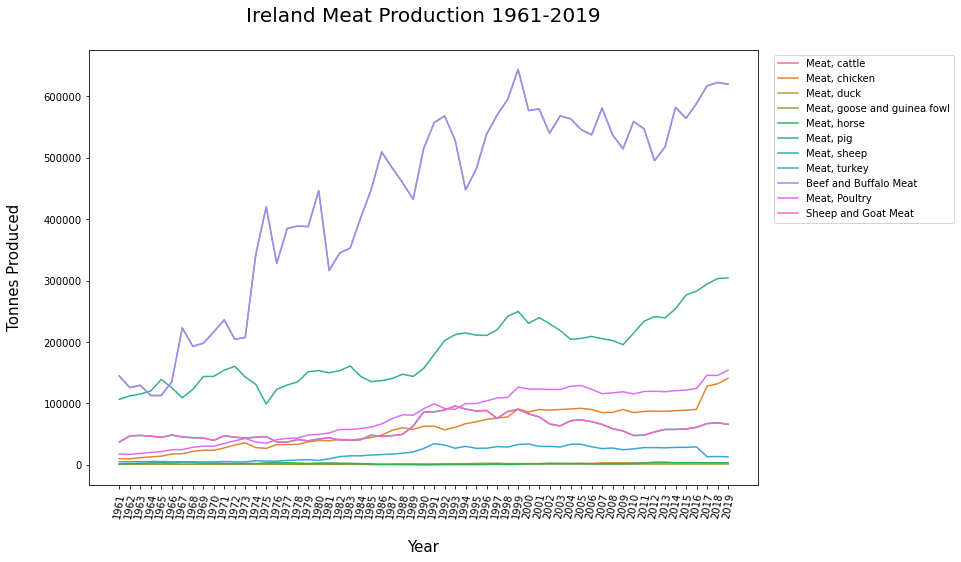

In [45]:
plt.figure(figsize = (12,8))
sns.lineplot(data=ireland_prod_meat, x="Year", y="Production Value", hue="Meat Type")  
plt.xlabel('\nYear', fontsize=15) 
plt.ylabel('Tonnes Produced\n', fontsize=15)
plt.title ('Ireland Meat Production 1961-2019\n', fontsize=20)
plt.legend(prop = {'size': 10}, loc='best', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation = 80);

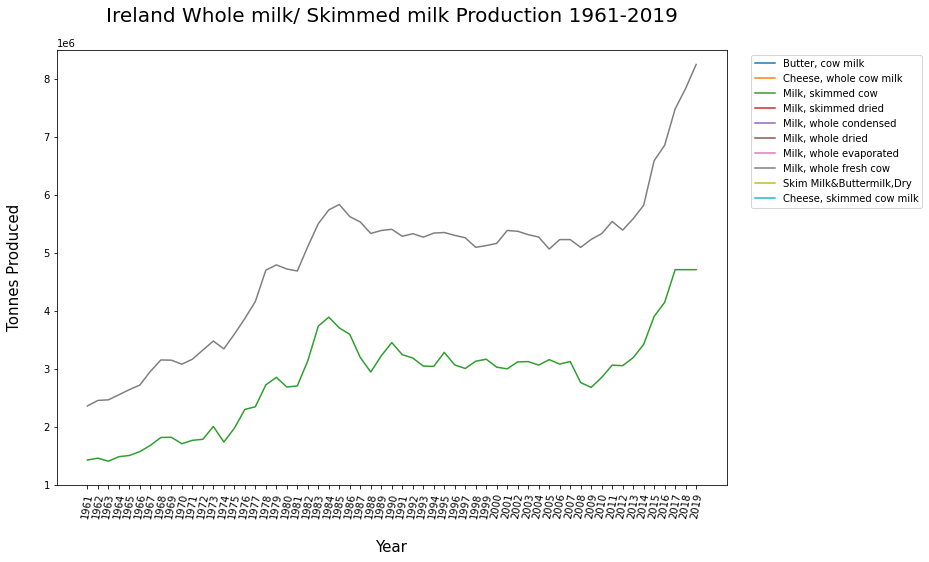

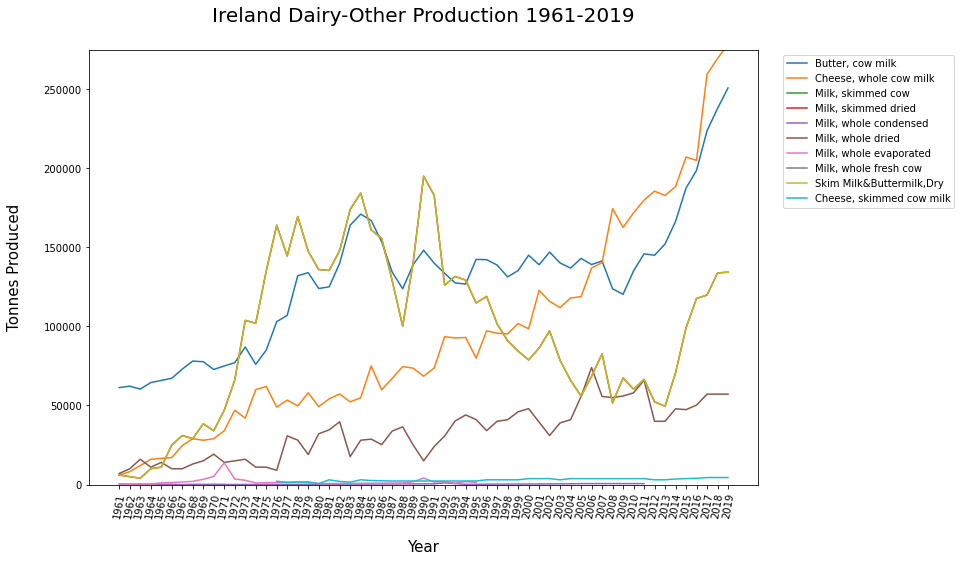

In [46]:
fig, ax = plt.subplots(figsize = (12,8))
vt = sns.lineplot(data=ireland_prod_dairy, x="Year", y="Production Value", hue="Dairy Product")  
vt = ax.set_ylim(1000000, 8500000);
plt.xlabel('\nYear', fontsize=15) 
plt.ylabel('Tonnes Produced\n', fontsize=15)
plt.title ('Ireland Whole milk/ Skimmed milk Production 1961-2019\n', fontsize=20)
plt.legend(prop = {'size': 10}, loc='best', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation = 80);

fig, ax = plt.subplots(figsize = (12,8))
vt = sns.lineplot(data=ireland_prod_dairy, x="Year", y="Production Value", hue="Dairy Product")  
vt = ax.set_ylim(0, 275000);
plt.xlabel('\nYear', fontsize=15) 
plt.ylabel('Tonnes Produced\n', fontsize=15)
plt.title ('Ireland Dairy-Other Production 1961-2019\n', fontsize=20)
plt.legend(prop = {'size': 10}, loc='best', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation = 80);

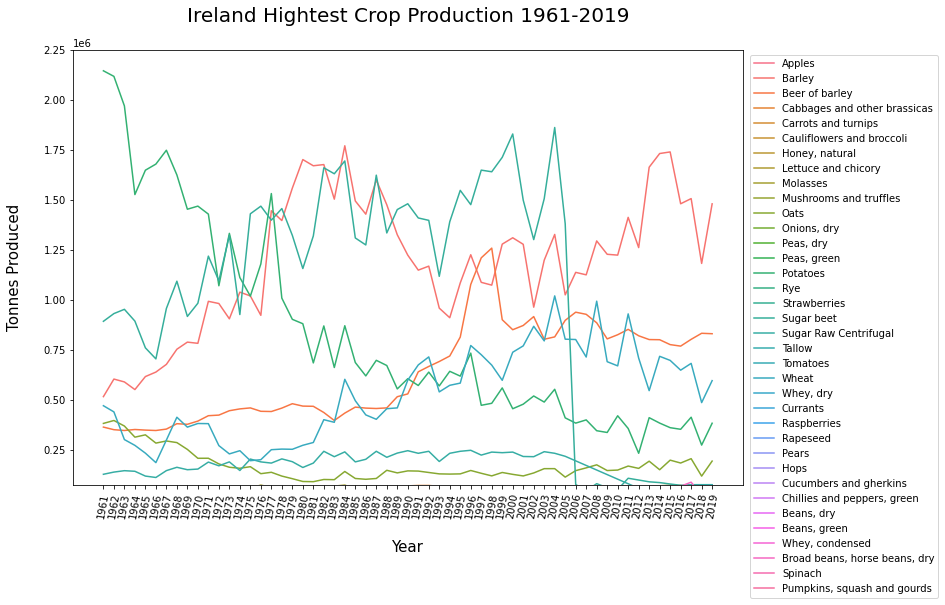

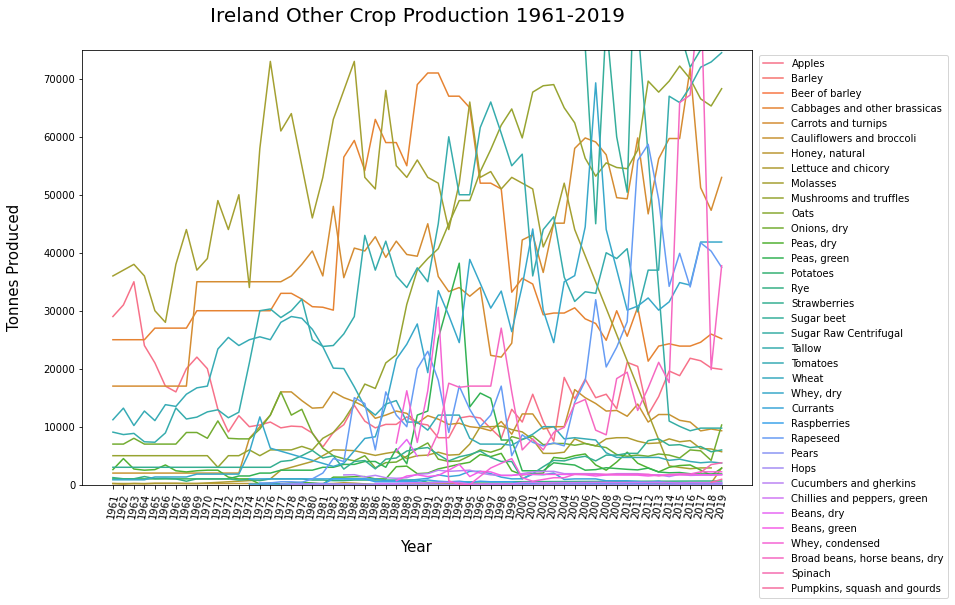

In [47]:
fig, ax = plt.subplots(figsize = (12,8))
vt = sns.lineplot(data=ireland_prod_crop, x="Year", y="Production Value", hue="Crop")  
vt = ax.set_ylim(75000, 2250000);
plt.xlabel('\nYear', fontsize=15) 
plt.ylabel('Tonnes Produced\n', fontsize=15)
plt.title ('Ireland Hightest Crop Production 1961-2019\n', fontsize=20)
plt.legend(prop = {'size': 10}, loc='best', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation = 80);

fig, ax = plt.subplots(figsize = (12,8))
vt = sns.lineplot(data=ireland_prod_crop, x="Year", y="Production Value", hue="Crop")  
vt = ax.set_ylim(0, 75000);
plt.xlabel('\nYear', fontsize=15) 
plt.ylabel('Tonnes Produced\n', fontsize=15)
plt.title ('Ireland Other Crop Production 1961-2019\n', fontsize=20)
plt.legend(prop = {'size': 10}, loc='best', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation = 80);

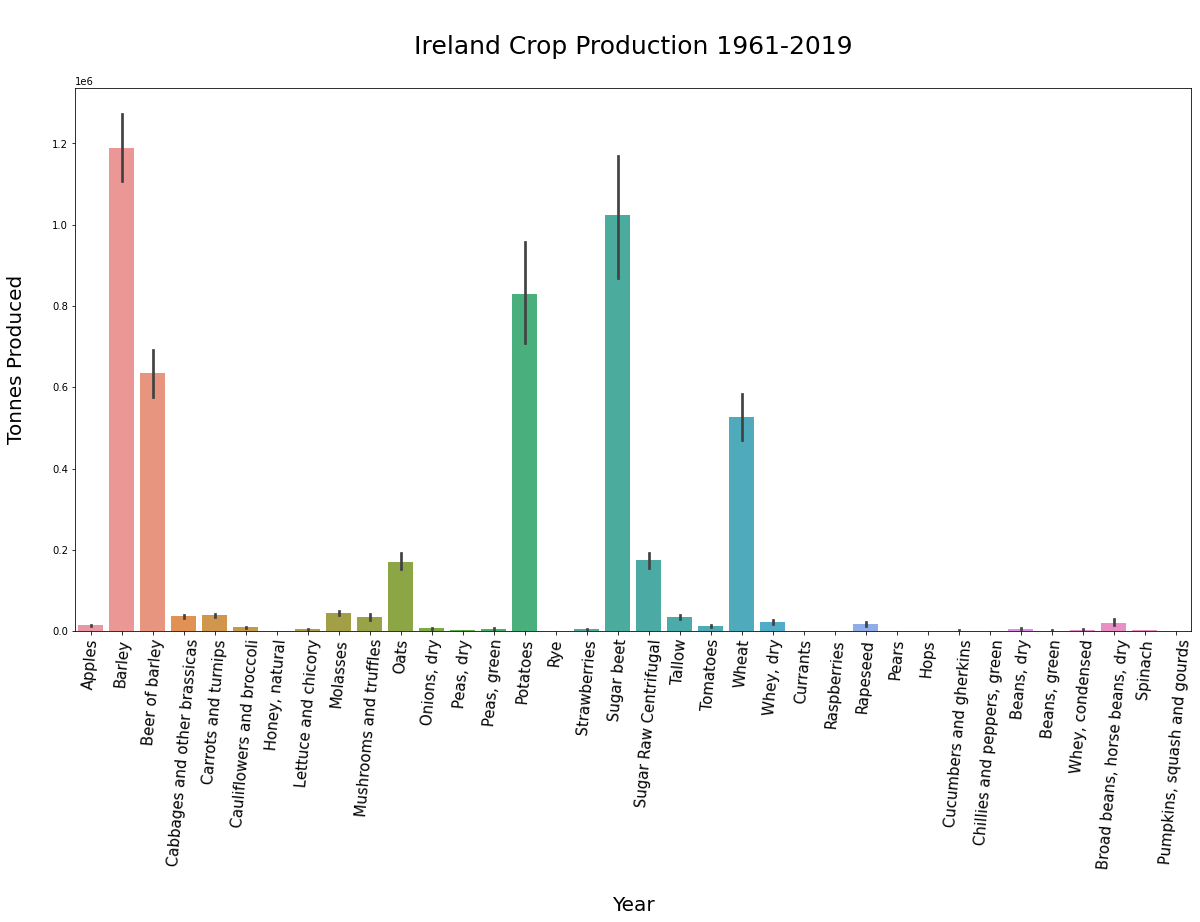

In [48]:
plt.figure(figsize = (20,10))
sns.barplot(data=ireland_prod_crop, x="Crop", y="Production Value")  
plt.xlabel('\nYear', fontsize=20) 
plt.ylabel('Tonnes Produced\n', fontsize=20)
plt.title ('\nIreland Crop Production 1961-2019\n', fontsize=25)
plt.xticks(fontsize=15, rotation = 85);

### Fix line graph to avoid clumping 

Attepmt to find a better way to display Crop data to avoid clumping. 

In [49]:
# sort values to use pct_change
ireland_prod_crop_test= ireland_prod_crop.sort_values(by=['Crop', 'Year'])

# add pc change column
ireland_prod_crop_test['Production Value PCT'] = ireland_prod_crop_test['Production Value'].pct_change().cumsum()

#reset index to use iloc
ireland_prod_crop_test.reset_index(drop=True, inplace=True)

# replace 1st value of PCT column
#ireland_dairy.iloc[[0],[10]] = 61300

ireland_prod_crop_test.head()

Prod Country    Crop     Element Production Unit  Year  Production Value  \
0      Ireland  Apples  Production          tonnes  1961             29000   
1      Ireland  Apples  Production          tonnes  1962             31000   
2      Ireland  Apples  Production          tonnes  1963             35000   
3      Ireland  Apples  Production          tonnes  1964             24000   
4      Ireland  Apples  Production          tonnes  1965             21000   

   Population_Ireland  Production Value PCT  
0             2824400                   NaN  
1             2836050              0.068966  
2             2852650              0.197998  
3             2866550             -0.116288  
4             2877300             -0.241288

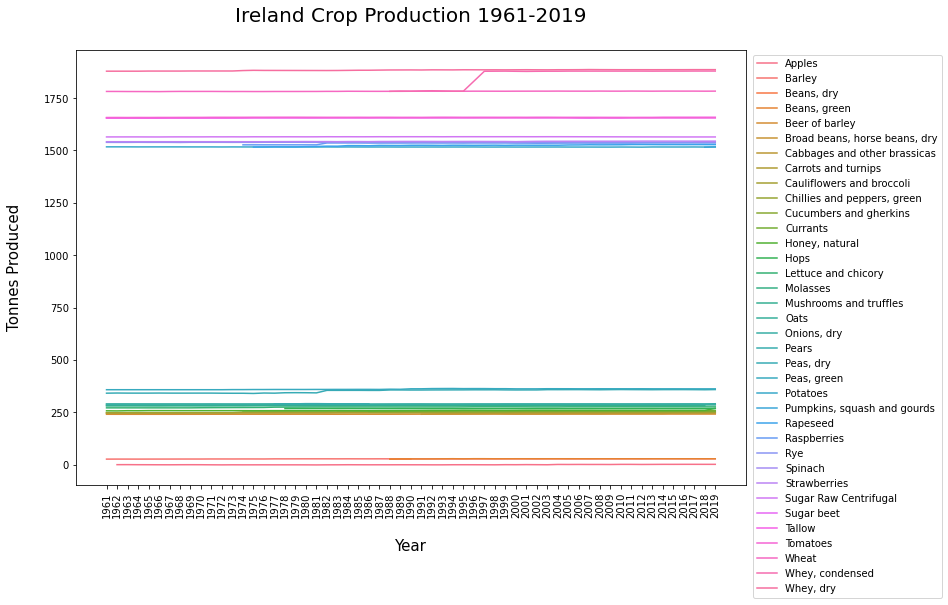

In [50]:
plt.figure(figsize = (12,8))
sns.lineplot(data=ireland_prod_crop_test, x="Year", y="Production Value PCT", hue="Crop")  
plt.xlabel('\nYear', fontsize=15) 
plt.ylabel('Tonnes Produced\n', fontsize=15)
plt.title ('Ireland Crop Production 1961-2019\n', fontsize=20)
plt.legend(prop = {'size': 10}, loc='best', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation = 90);

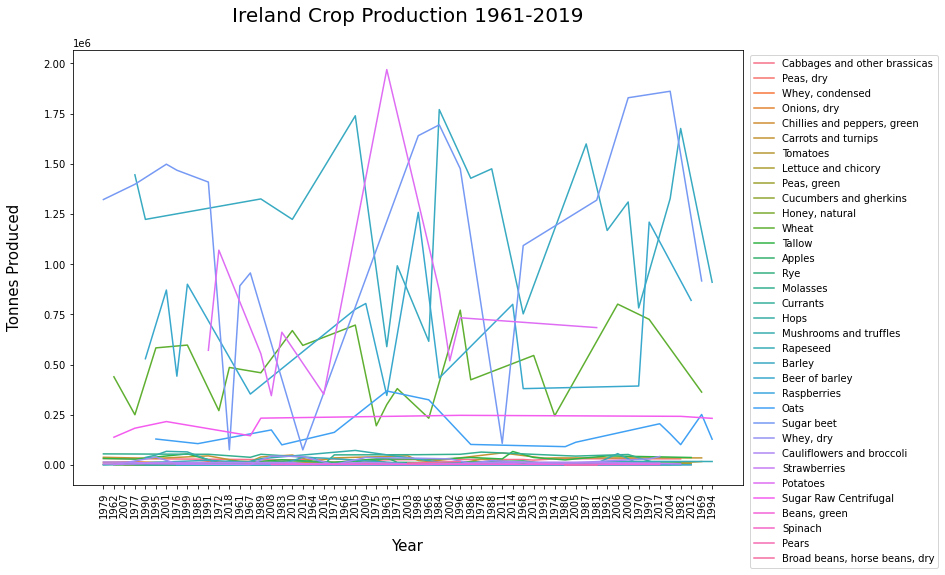

In [51]:
#create a sample for better visualisations 
# https://www.geeksforgeeks.org/python-pandas-dataframe-sample/

# create new sample df
ireland_prod_crop_sample = ireland_prod_crop.sample(frac =.25)

#sort values by year
ireland_prod_crop_sample.sort_values(by=['Crop', 'Year'])

plt.figure(figsize = (12,8))
sns.lineplot(data=ireland_prod_crop_sample, x="Year", y="Production Value", hue="Crop")  
plt.xlabel('\nYear', fontsize=15) 
plt.ylabel('Tonnes Produced\n', fontsize=15)
plt.title ('Ireland Crop Production 1961-2019\n', fontsize=20)
plt.legend(prop = {'size': 10}, loc='best', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation = 90);

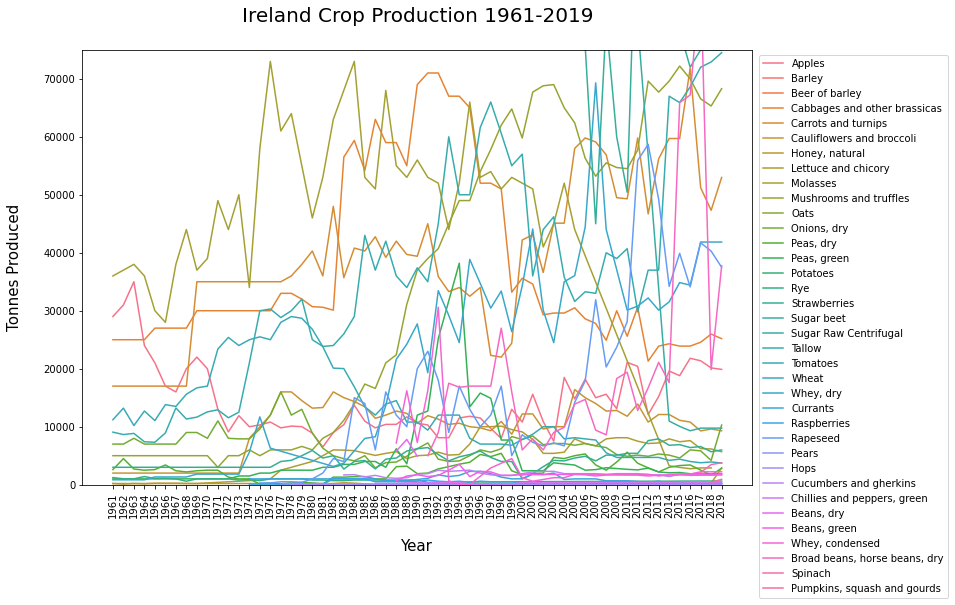

In [52]:
#reset graph limits to work for crop items

fig, ax = plt.subplots(figsize = (12,8))
vt = sns.lineplot(data=ireland_prod_crop, x="Year", y="Production Value", hue="Crop")  
vt = ax.set_ylim(0, 75000);
plt.xlabel('\nYear', fontsize=15) 
plt.ylabel('Tonnes Produced\n', fontsize=15)
plt.title ('Ireland Crop Production 1961-2019\n', fontsize=20)
plt.legend(prop = {'size': 10}, loc='best', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation = 90);

## Ireland Trade Datasets

In order to calculate consumption of a product; production, export and import data on a particular crop is required.
Ireland Trade data will be sorted into  seperate 'Import Quantity / Import Value / Export Quantity/ Export Value' datasets using the loc function. 

Agian columns will be remaned to allow for easy column identification once date is merged with production data. This data will then and brought into the Ireland dataset using a merge function.

The shape function will show how many rows are present in each dataset. This number is likely to be different to the production data but is expected to drop once merged with trade data as only rows that have all elements related to consumption (import/ export/ production data) will be kept.


In [53]:
# create irish dataset
ireland_trade = europe_trade_df.loc[europe_trade_df['Country']=='Ireland']

# irish import/ export datasets - all products (crop, meat, livestock)
ireland_imports = ireland_trade.loc[ireland_trade['Element']=='Import Quantity']
ireland_exports = ireland_trade.loc[ireland_trade['Element']=='Export Quantity']
ireland_imports_val = ireland_trade.loc[ireland_trade['Element']=='Import Value']
ireland_exports_val = ireland_trade.loc[ireland_trade['Element']=='Export Value']

# rename Value Columns 
ireland_imports.rename(columns={'Value': 'Import Quantity'}, inplace=True)
ireland_exports.rename(columns={'Value': 'Export Quantity'}, inplace=True)
ireland_exports.rename(columns={'Unit': 'Export Unit'}, inplace=True)
ireland_imports.rename(columns={'Unit': 'Import Unit'}, inplace=True)
ireland_imports_val.rename(columns={'Value': 'Import Value'}, inplace=True)
ireland_exports_val.rename(columns={'Value': 'Export Value'}, inplace=True)

#reset index
ireland_imports.reset_index(drop=True, inplace=True)
ireland_exports.reset_index(drop=True, inplace=True)
ireland_imports_val.reset_index(drop=True, inplace=True)
ireland_exports_val.reset_index(drop=True, inplace=True)

In [54]:
# merge population data. Outer merge so no data is lost 
#ireland_imports = pd.merge(ireland_imports, ireland_pop, how="outer", on = ["Year"])
#ireland_exports = pd.merge(ireland_exports, ireland_pop, how="outer", on = ["Year"])

ireland_imports.head()
ireland_exports.head()
ireland_imports_val.head()
ireland_exports_val.head()

Country   Crop_Livestock          Element Import Unit  Year  \
0  Ireland  Almonds shelled  Import Quantity      tonnes  1961   
1  Ireland           Apples  Import Quantity      tonnes  1961   
2  Ireland          Bananas  Import Quantity      tonnes  1961   
3  Ireland           Barley  Import Quantity      tonnes  1961   
4  Ireland  Barley, pearled  Import Quantity      tonnes  1961   

   Import Quantity  
0            493.0  
1           9085.0  
2          11180.0  
3           4544.0  
4           2177.0

Country  Crop_Livestock          Element Export Unit  Year  Export Quantity
0  Ireland          Apples  Export Quantity      tonnes  1961             24.0
1  Ireland           Asses  Export Quantity        Head  1961           1362.0
2  Ireland   Bacon and ham  Export Quantity      tonnes  1961          28761.0
3  Ireland          Barley  Export Quantity      tonnes  1961           1755.0
4  Ireland  Beer of barley  Export Quantity      tonnes  1961         202407.0

Country    Crop_Livestock       Element      Unit  Year  Import Value
0  Ireland   Almonds shelled  Import Value  1000 US$  1961         489.0
1  Ireland  Animals live nes  Import Value  1000 US$  1961         264.0
2  Ireland            Apples  Import Value  1000 US$  1961        2047.0
3  Ireland           Bananas  Import Value  1000 US$  1961        1592.0
4  Ireland            Barley  Import Value  1000 US$  1961         356.0

Country    Crop_Livestock       Element      Unit  Year  Export Value
0  Ireland  Animals live nes  Export Value  1000 US$  1961           2.0
1  Ireland            Apples  Export Value  1000 US$  1961           7.0
2  Ireland             Asses  Export Value  1000 US$  1961          31.0
3  Ireland     Bacon and ham  Export Value  1000 US$  1961       19757.0
4  Ireland            Barley  Export Value  1000 US$  1961         116.0

In [55]:
ireland_imports.shape
ireland_exports.shape
ireland_imports_val.shape
ireland_exports_val.shape

(17980, 6)

(14211, 6)

(18784, 6)

(15196, 6)

In [56]:
ireland_imports['Crop_Livestock'].unique()

array(['Almonds shelled', 'Apples', 'Bananas', 'Barley',
       'Barley, pearled', 'Beans, dry', 'Beer of barley', 'Beeswax',
       'Beverages, distilled alcoholic', 'Beverages, non alcoholic',
       'Bran, wheat', 'Butter, cow milk', 'Cake, cottonseed',
       'Cake, groundnuts', 'Cake, linseed', 'Cake, soybeans', 'Cattle',
       'Cereals, breakfast', 'Cheese, whole cow milk', 'Chickens',
       'Chocolate products nes', 'Cider etc', 'Cigarettes',
       'Cigars, cheroots', 'Cocoa, beans', 'Cocoa, butter',
       'Cocoa, paste', 'Coconuts, desiccated', 'Coffee, extracts',
       'Coffee, green', 'Coffee, roasted', 'Copra', 'Cotton lint',
       'Cotton linter', 'Cotton waste', 'Dates', 'Eggs, hen, in shell',
       'Fatty acids', 'Fibre crops nes', 'Figs dried', 'Flour, cereals',
       'Flour, mustard', 'Flour, pulses', 'Flour, roots and tubers nes',
       'Flour, wheat', 'Food wastes', 'Fruit, dried nes',
       'Fruit, prepared nes', 'Fruit, tropical fresh nes',
       'Glucose

## Merge Ireland Trade & Production 

As both Ireland production and Ireland Trade data have been cleaned and missing values have either been imputed/ removed, an Inner Merge is suitable to use here. There are significantly less rows in the production datataset than in the exports/ imports dataset. This is to be expected for imports as the Ireland would typically import products it does not produce/ produce enough of itelf. For export data it is possible there is more records available.

This analysis is focusing on how irish production and consumption has changed over time in line with consumer diet trends and thus impacted irelands agriculture. In order to calculate consumption of a product; production, export and import data on a particular crop is required. 

Therefore the analysis should include data on  all 3. An inner merge would be suitable in most circumstances, however there are situations where a country may produce and export an item and have no need to import as supplies are high. Likewise a country might not produce an item so imports are high and exports are non existant. An inner merge would only keep rows where the selected values exists in both the left and right dataframes. 

Therefore an outer merge will be used when merging import values. This is most suitable here as to not loose any data where a country would import but not produce. An left merge will be used for export values, so data will only be merged if production values exist. 

"Crop_Livestock" and "Year" will both used during merge to ensure no duplicate values are added.

Missing values wil be checked once more to ensure no data was lost/skewed during the merge. 

Finally, some item names differ between the datasets. These will be identified & replaced to simplify the datasets. For this analysis, 'meat preparations' (mince) will be catagorised alongside meat, cattle / meat, pig accordingly.  

In [57]:
# merge population data. 
ireland_add_exports = pd.merge(ireland_prod_pop, ireland_exports, how="left", on = ["Crop_Livestock", "Year"])

In [58]:
ireland_add_exports.head()

Prod Country    Crop_Livestock   Element_x Production Unit  Year  \
0      Ireland            Apples  Production          tonnes  1961   
1      Ireland            Barley  Production          tonnes  1961   
2      Ireland    Beer of barley  Production          tonnes  1961   
3      Ireland       Berries nes  Production          tonnes  1961   
4      Ireland  Butter, cow milk  Production          tonnes  1961   

   Production Value  Population_Ireland  Country        Element_y Export Unit  \
0             29000             2824400  Ireland  Export Quantity      tonnes   
1            515400             2824400  Ireland  Export Quantity      tonnes   
2            363000             2824400  Ireland  Export Quantity      tonnes   
3              1000             2824400      NaN              NaN         NaN   
4             61300             2824400  Ireland  Export Quantity      tonnes   

   Export Quantity  
0             24.0  
1           1755.0  
2         202407.0  
3              NaN  
4          15399.0

In [59]:
ireland_add_exports.shape

(4757, 11)

In [60]:
# merge data. 
ireland_df = pd.merge(ireland_add_exports, ireland_imports, how="outer", on = ["Crop_Livestock", "Year"])

# merge population data. Outer merge so no data is lost 

ireland_df = pd.merge(ireland_df, ireland_pop, how="outer", on = ["Year"])
ireland_df.head()

#ireland_add_imvals = pd.merge(ireland_add_exports, ireland_imports_val, how="outer", on = ["Crop_Livestock", "Year"])
#ireland_df = pd.merge(ireland_add_imvals, ireland_exports_val, how="outer", on = ["Crop_Livestock", "Year"])

Prod Country    Crop_Livestock   Element_x Production Unit  Year  \
0      Ireland            Apples  Production          tonnes  1961   
1      Ireland            Barley  Production          tonnes  1961   
2      Ireland    Beer of barley  Production          tonnes  1961   
3      Ireland       Berries nes  Production          tonnes  1961   
4      Ireland  Butter, cow milk  Production          tonnes  1961   

   Production Value  Population_Ireland_x Country_x        Element_y  \
0           29000.0             2824400.0   Ireland  Export Quantity   
1          515400.0             2824400.0   Ireland  Export Quantity   
2          363000.0             2824400.0   Ireland  Export Quantity   
3            1000.0             2824400.0       NaN              NaN   
4           61300.0             2824400.0   Ireland  Export Quantity   

  Export Unit  Export Quantity Country_y          Element Import Unit  \
0      tonnes             24.0   Ireland  Import Quantity      tonnes   
1      tonnes           1755.0   Ireland  Import Quantity      tonnes   
2      tonnes         202407.0   Ireland  Import Quantity      tonnes   
3         NaN              NaN       NaN              NaN         NaN   
4      tonnes          15399.0   Ireland  Import Quantity      tonnes   

   Import Quantity  Population_Ireland_y  
0           9085.0               2824400  
1           4544.0               2824400  
2           3564.0               2824400  
3              NaN               2824400  
4             41.0               2824400

In [61]:
ireland_df.shape

(19745, 16)

In [62]:
ireland_df.columns

Index(['Prod Country', 'Crop_Livestock', 'Element_x', 'Production Unit',
       'Year', 'Production Value', 'Population_Ireland_x', 'Country_x',
       'Element_y', 'Export Unit', 'Export Quantity', 'Country_y', 'Element',
       'Import Unit', 'Import Quantity', 'Population_Ireland_y'],
      dtype='object')

In [63]:
# drop duplicate / unnecessary columns
ire_to_drop = ['Element_x', 'Country_x', 'Element_y', 'Country_y', 'Element', 'Population_Ireland_x']
ireland_df = ireland_df.drop(ire_to_drop, axis = 1)

# rename columns to include unit
ireland_df.rename(columns={'Population_Ireland_y' : 'Population_Ireland'}, inplace=True)

#reorder columns 
ire_columns = ['Prod Country', 'Crop_Livestock', 'Year', 'Production Unit',  'Production Value', 'Import Unit', 'Import Quantity', 'Export Unit', 'Export Quantity',  'Population_Ireland']
ireland_df = ireland_df.reindex(columns=ire_columns)

# check dataset
ireland_df.head(100)

Prod Country    Crop_Livestock  Year Production Unit  Production Value  \
0       Ireland            Apples  1961          tonnes           29000.0   
1       Ireland            Barley  1961          tonnes          515400.0   
2       Ireland    Beer of barley  1961          tonnes          363000.0   
3       Ireland       Berries nes  1961          tonnes            1000.0   
4       Ireland  Butter, cow milk  1961          tonnes           61300.0   
..          ...               ...   ...             ...               ...   
95          NaN   Coffee, roasted  1961             NaN               NaN   
96          NaN             Copra  1961             NaN               NaN   
97          NaN       Cotton lint  1961             NaN               NaN   
98          NaN     Cotton linter  1961             NaN               NaN   
99          NaN      Cotton waste  1961             NaN               NaN   

   Import Unit  Import Quantity Export Unit  Export Quantity  \
0       tonnes           9085.0      tonnes             24.0   
1       tonnes           4544.0      tonnes           1755.0   
2       tonnes           3564.0      tonnes         202407.0   
3          NaN              NaN         NaN              NaN   
4       tonnes             41.0      tonnes          15399.0   
..         ...              ...         ...              ...   
95      tonnes              3.0         NaN              NaN   
96      tonnes           4840.0         NaN              NaN   
97      tonnes           5930.0         NaN              NaN   
98      tonnes             15.0         NaN              NaN   
99      tonnes           1032.0         NaN              NaN   

    Population_Ireland  
0              2824400  
1              2824400  
2              2824400  
3              2824400  
4              2824400  
..                 ...  
95             2824400  
96             2824400  
97             2824400  
98             2824400  
99             2824400  

[100 rows x 10 columns]

In [64]:
# number of missing values 
ireland_df.isnull().sum()

Prod Country          14988
Crop_Livestock            0
Year                      0
Production Unit       14988
Production Value      14988
Import Unit            1738
Import Quantity        1738
Export Unit           16700
Export Quantity       16700
Population_Ireland        0
dtype: int64

In [65]:
#check the amount of 0's in each column
ireland_df_sparse = (ireland_df == 0).sum()
ireland_df_sparse

Prod Country          0
Crop_Livestock        0
Year                  0
Production Unit       0
Production Value      0
Import Unit           0
Import Quantity       0
Export Unit           0
Export Quantity       0
Population_Ireland    0
dtype: int64

In [66]:
# drop all rows with NaN and 0 values

# first will replace 0 values with NaNs  
ireland_df['Prod Country'].replace(to_replace = np.nan, value = 'Ireland', inplace=True)

# first will replace 0 values with NaNs  
ireland_df.replace(to_replace = np.nan, value = 0, inplace=True)

# check if we have any NaN values in our dataset
ireland_df.isnull().sum()

Prod Country          0
Crop_Livestock        0
Year                  0
Production Unit       0
Production Value      0
Import Unit           0
Import Quantity       0
Export Unit           0
Export Quantity       0
Population_Ireland    0
dtype: int64

In [67]:
ireland_df_sparse

Prod Country          0
Crop_Livestock        0
Year                  0
Production Unit       0
Production Value      0
Import Unit           0
Import Quantity       0
Export Unit           0
Export Quantity       0
Population_Ireland    0
dtype: int64

In [68]:
# cast value as int 
ireland_df['Production Value'] = ireland_df['Production Value'].astype('int')
ireland_df['Import Quantity'] = ireland_df['Import Quantity'].astype('int')
ireland_df['Export Quantity'] = ireland_df['Export Quantity'].astype('int')
ireland_df['Population_Ireland'] = ireland_df['Population_Ireland'].astype('int')

In [69]:
# replace items with differeng names across datasets 
ireland_df.replace(to_replace = 'Meat, beef, preparations', value = 'Meat, beef' , inplace=True)
ireland_df.replace(to_replace = 'Beef and Buffalo Meat', value = 'Meat, beef' , inplace=True)
ireland_df.replace(to_replace = 'Meat, cattle, boneless (beef & veal)', value = 'Meat, beef' , inplace=True)
ireland_df.replace(to_replace = 'Meat, cattle', value = 'Meat, beef' , inplace=True)
ireland_df.replace(to_replace = 'Pigmeat', value = 'Meat, pig' , inplace=True)
ireland_df.replace(to_replace = 'Meat, pig, preparations', value = 'Meat, pig' , inplace=True)
ireland_df.replace(to_replace = 'Bovine Meat', value = 'Meat, beef' , inplace=True)
ireland_df.replace(to_replace = 'Meat, goose and guinea fowl', value = 'Meat, goose' , inplace=True)

## Feature Engineering - Ireland Consumption 

In order to analyse whether Irelands consumption has changed over time in line with changing diet  trends, a consumption column wil need to be feature engineered. To calculate consumption of a product; production, export and import data on a particular crop is required and the folowing equation will be used:

    Consumption = (Production + Imports) - Exports 

This calaculation is as adaptation of the calculation used to calculate GDP, which is:

    GDP = Domestic Consumption (C) + Domestic gross investment (In) + Government spending (G) + [Exports (E)—Imports (I )], or GDP = C + In + G + (E—I)

https://www.wilsoncenter.org/chapter-3-trade-agreements-and-economic-theory


In [70]:
ireland_df['Consumption'] = (ireland_df['Production Value'] + ireland_df['Import Quantity']) - ireland_df['Export Quantity']

In [71]:
ireland_df

Prod Country       Crop_Livestock  Year Production Unit  \
0          Ireland               Apples  1961          tonnes   
1          Ireland               Barley  1961          tonnes   
2          Ireland       Beer of barley  1961          tonnes   
3          Ireland          Berries nes  1961          tonnes   
4          Ireland     Butter, cow milk  1961          tonnes   
...            ...                  ...   ...             ...   
19740      Ireland       Natural Rubber  2019               0   
19741      Ireland       Textile Fibres  2019               0   
19742      Ireland      Hides and skins  2019               0   
19743      Ireland  Crude Materials nes  2019               0   
19744      Ireland              Tobacco  2019               0   

       Production Value Import Unit  Import Quantity Export Unit  \
0                 29000      tonnes             9085      tonnes   
1                515400      tonnes             4544      tonnes   
2                363000      tonnes             3564      tonnes   
3                  1000           0                0           0   
4                 61300      tonnes               41      tonnes   
...                 ...         ...              ...         ...   
19740                 0      tonnes              372           0   
19741                 0      tonnes             3204           0   
19742                 0      tonnes               83           0   
19743                 0      tonnes              121           0   
19744                 0      tonnes             3176           0   

       Export Quantity  Population_Ireland  Consumption  
0                   24             2824400        38061  
1                 1755             2824400       518189  
2               202407             2824400       164157  
3                    0             2824400         1000  
4                15399             2824400        45942  
...                ...                 ...          ...  
19740                0             4934340          372  
19741                0             4934340         3204  
19742                0             4934340           83  
19743                0             4934340          121  
19744                0             4934340         3176  

[19745 rows x 11 columns]

## Ireland Meat/ Dairy/ Crop Datasets

As the focus of this analysis is how irish production and consumption has changed over time in line with consumer diet trends and thus impacted irelands agriculture, the ireland_df can be divided into Meat / Dairy / Crop datasets for further analysis. This will be done by using the str.contains function to specify what products should/ should not be included in each dataset.

The .unique and loc functions will then be used to further filter each dataset and remove any unwanted/ non relevant  products from each dataset. 

In [72]:
# irish production meat products
ireland_meat = ireland_df.loc[ireland_df['Crop_Livestock'].str.contains('meat', case=False)]
ireland_meat.rename(columns={'Crop_Livestock': 'Meat_Type'}, inplace=True)
ireland_meat.reset_index(drop=True)

# irish production dairy products
ireland_dairy = ireland_df.loc[ireland_df['Crop_Livestock'].str.contains('milk|cream', case=False)]
ireland_dairy.rename(columns={'Crop_Livestock': 'Dairy_Product'}, inplace=True)
ireland_dairy.reset_index(drop=True)

# irish production crops
ireland_crop = ireland_df.loc[ireland_df['Crop_Livestock'].str.contains('apple|banana|orange|mandarin|melon|pear|pineapple|berries|avacado|potato|onoin|carrot|tomato|cabbage|lettuce|oats|soya|soy|wheat|sugar|bean|mushroom|tofu|temph|Lentils|Chickpeas|Peanuts|Almonds|Spirulina|Quinoa', case=False)]
ireland_crop = ireland_crop.loc[ireland_crop['Crop_Livestock'].str.contains('goat|juice|other|paste|sauce|canned|cake|frozen|nes|confectionery|oil|primary', case=False) == False]
ireland_crop.rename(columns={'Crop_Livestock': 'Crop'}, inplace=True)
ireland_crop.reset_index(drop=True)


Prod Country      Meat_Type  Year Production Unit  Production Value  \
0         Ireland       Meat nes  1961          tonnes              5000   
1         Ireland     Meat, beef  1961          tonnes            144539   
2         Ireland  Meat, chicken  1961          tonnes             10000   
3         Ireland     Meat, duck  1961          tonnes              1400   
4         Ireland    Meat, goose  1961          tonnes              1000   
...           ...            ...   ...             ...               ...   
1439      Ireland   Meat, rabbit  2019               0                 0   
1440      Ireland     Meat, beef  2019               0                 0   
1441      Ireland   Poultry Meat  2019               0                 0   
1442      Ireland      Meat, pig  2019               0                 0   
1443      Ireland     Other Meat  2019               0                 0   

     Import Unit  Import Quantity Export Unit  Export Quantity  \
0              0                0      tonnes              440   
1         tonnes               11      tonnes            38746   
2              0                0      tonnes             1058   
3              0                0           0                0   
4              0                0      tonnes               95   
...          ...              ...         ...              ...   
1439      tonnes                1           0                0   
1440      tonnes            36836           0                0   
1441      tonnes           152207           0                0   
1442      tonnes           108233           0                0   
1443      tonnes            21202           0                0   

      Population_Ireland  Consumption  
0                2824400         4560  
1                2824400       105804  
2                2824400         8942  
3                2824400         1400  
4                2824400          905  
...                  ...          ...  
1439             4934340            1  
1440             4934340        36836  
1441             4934340       152207  
1442             4934340       108233  
1443             4934340        21202  

[1444 rows x 11 columns]

Prod Country                               Dairy_Product  Year  \
0        Ireland                            Butter, cow milk  1961   
1        Ireland                      Cheese, whole cow milk  1961   
2        Ireland                                 Cream fresh  1961   
3        Ireland                           Milk, skimmed cow  1961   
4        Ireland                         Milk, skimmed dried  1961   
..           ...                                         ...   ...   
855      Ireland         Buttermilk, curdled, acidified milk  2019   
856      Ireland                    Ice cream and edible ice  2019   
857      Ireland  Milk, products of natural constituents nes  2019   
858      Ireland                       Milk, whole condensed  2019   
859      Ireland                      Milk, whole evaporated  2019   

    Production Unit  Production Value Import Unit  Import Quantity  \
0            tonnes             61300      tonnes               41   
1            tonnes              6000      tonnes              140   
2            tonnes              2000           0                0   
3            tonnes           1423066      tonnes               45   
4            tonnes              6000           0                0   
..              ...               ...         ...              ...   
855               0                 0      tonnes            42165   
856               0                 0      tonnes            31228   
857               0                 0      tonnes             1699   
858               0                 0      tonnes             2846   
859               0                 0      tonnes              269   

    Export Unit  Export Quantity  Population_Ireland  Consumption  
0        tonnes            15399             2824400        45942  
1        tonnes             2370             2824400         3770  
2        tonnes             1455             2824400          545  
3             0                0             2824400      1423111  
4        tonnes             6199             2824400         -199  
..          ...              ...                 ...          ...  
855           0                0             4934340        42165  
856           0                0             4934340        31228  
857           0                0             4934340         1699  
858           0                0             4934340         2846  
859           0                0             4934340          269  

[860 rows x 11 columns]

Prod Country                    Crop  Year Production Unit  \
0         Ireland                  Apples  1961          tonnes   
1         Ireland     Carrots and turnips  1961          tonnes   
2         Ireland     Lettuce and chicory  1961          tonnes   
3         Ireland  Mushrooms and truffles  1961          tonnes   
4         Ireland                    Oats  1961          tonnes   
...           ...                     ...   ...             ...   
1968      Ireland           Sugar refined  2019               0   
1969      Ireland          Sweet potatoes  2019               0   
1970      Ireland        Tomatoes, peeled  2019               0   
1971      Ireland             Watermelons  2019               0   
1972      Ireland         Sugar and Honey  2019               0   

      Production Value Import Unit  Import Quantity Export Unit  \
0                29000      tonnes             9085      tonnes   
1                17000           0                0           0   
2                  200           0                0           0   
3                 5000           0                0      tonnes   
4               381400      tonnes            22826      tonnes   
...                ...         ...              ...         ...   
1968                 0      tonnes           106804           0   
1969                 0      tonnes             4654           0   
1970                 0      tonnes            19999           0   
1971                 0      tonnes             3818           0   
1972                 0      tonnes           486035           0   

      Export Quantity  Population_Ireland  Consumption  
0                  24             2824400        38061  
1                   0             2824400        17000  
2                   0             2824400          200  
3                 671             2824400         4329  
4                 438             2824400       403788  
...               ...                 ...          ...  
1968                0             4934340       106804  
1969                0             4934340         4654  
1970                0             4934340        19999  
1971                0             4934340         3818  
1972                0             4934340       486035  

[1973 rows x 11 columns]

In [73]:
ireland_crop['Crop'].unique()

array(['Apples', 'Carrots and turnips', 'Lettuce and chicory',
       'Mushrooms and truffles', 'Oats', 'Potatoes', 'Strawberries',
       'Sugar beet', 'Sugar Raw Centrifugal', 'Tomatoes', 'Wheat',
       'Almonds shelled', 'Bananas', 'Barley, pearled', 'Beans, dry',
       'Bran, wheat', 'Cocoa, beans', 'Flour, wheat', 'Oats rolled',
       'Oranges', 'Pears', 'Sugar and Honey', 'Soybeans', 'Sugar refined',
       'Flour, potatoes', 'Raspberries', 'Broad beans, horse beans, dry',
       'Buckwheat', 'Lentils', 'Pineapples', 'Tomatoes, peeled',
       'Beans, green', 'Blueberries', 'Sweet potatoes', 'Watermelons',
       'Almonds, with shell', 'Maple sugar and syrups', 'Cranberries',
       'Quinoa'], dtype=object)

In [74]:
# check Meat Type values are what we want for analysis
ireland_meat['Meat_Type'].unique()

array(['Meat nes', 'Meat, beef', 'Meat, chicken', 'Meat, duck',
       'Meat, goose', 'Meat, horse', 'Meat, pig', 'Meat, sheep',
       'Meat, turkey', 'Meat, Poultry', 'Meat, Total',
       'Sheep and Goat Meat', 'Meal, meat', 'Meat, pig sausages',
       'Poultry Meat', 'Other Meat', 'Meat, chicken, canned',
       'Meat, rabbit', 'Meat, dried nes', 'Meat, game', 'Meat, goat',
       'Meat, pork'], dtype=object)

In [75]:
ireland_meat = ireland_meat.loc[ireland_meat['Meat_Type'].str.contains('nes|total|poultry|other|canned', case=False) == False]
ireland_meat = ireland_meat.loc[ireland_meat['Meat_Type'].str.contains('Sheep and Goat Meat', case=False) == False]

In [76]:
ireland_dairy['Dairy_Product'].unique()

array(['Butter, cow milk', 'Cheese, whole cow milk', 'Cream fresh',
       'Milk, skimmed cow', 'Milk, skimmed dried',
       'Milk, whole condensed', 'Milk, whole dried',
       'Milk, whole evaporated', 'Milk, whole fresh cow',
       'Evaporat&Condensed Milk', 'Milk, Total',
       'Skim Milk&Buttermilk,Dry', 'Cheese, skimmed cow milk',
       'Cheese, sheep milk', 'Buttermilk, curdled, acidified milk',
       'Ice cream and edible ice',
       'Milk, products of natural constituents nes'], dtype=object)

In [77]:
ireland_dairy = ireland_dairy.loc[ireland_dairy['Dairy_Product'] != 'Evaporat&Condensed Milk']
ireland_dairy = ireland_dairy.loc[ireland_dairy['Dairy_Product'] != 'Buttermilk, curdled, acidified milk']
ireland_dairy = ireland_dairy.loc[ireland_dairy['Dairy_Product'] != 'Ice cream and edible ice']
ireland_dairy = ireland_dairy.loc[ireland_dairy['Dairy_Product'] != 'Skim Milk&Buttermilk,Dry']
ireland_dairy = ireland_dairy.loc[ireland_dairy['Dairy_Product'].str.contains('total|nes', case=False) == False]

### Descriptive Statistics per product type for all years

Now the data has been cleaned, descriptive statistical analysis can begin. A mean production / import/ export value will be shown for each product type (meat, dairy, crop). Min/ max info, inter quatrile ranges and standard diveation form the mean will also be shown per product type across production/ imports / exports. 

Population data can be ignored here as data will be skewed. 


In [78]:
# for all meat products 1961-2019
ireland_meat.describe()

# for all dairy products 1961-2019
ireland_dairy.describe()

# for all crops 1961-2019
ireland_crop.describe()

Production Value  Import Quantity  Export Quantity  Population_Ireland  \
count       1017.000000      1017.000000      1017.000000        1.017000e+03   
mean       68762.620452      7057.859390     10616.990167        3.766506e+06   
std       149414.735256     15836.252926     28308.022195        6.185158e+05   
min            0.000000         0.000000         0.000000        2.824400e+06   
25%            0.000000         9.000000         0.000000        3.373750e+06   
50%          640.000000       806.000000         0.000000        3.590386e+06   
75%        45000.000000      6540.000000      2965.000000        4.398942e+06   
max       643800.000000    129000.000000    268506.000000        4.934340e+06   

         Consumption  
count    1017.000000  
mean    65203.489676  
std    136758.545494  
min         0.000000  
25%       709.000000  
50%      5773.000000  
75%     34351.000000  
max    643800.000000

Production Value  Import Quantity  Export Quantity  Population_Ireland  \
count      5.990000e+02       599.000000       599.000000        5.990000e+02   
mean       7.920176e+05     18753.131886     36653.697830        3.712561e+06   
std        1.646512e+06     74072.620499     52800.891866        6.093569e+05   
min        0.000000e+00         0.000000         0.000000        2.824400e+06   
25%        2.250000e+03        75.500000         0.000000        3.282200e+06   
50%        3.900000e+04       909.000000      7902.000000        3.558430e+06   
75%        1.481000e+05      5458.500000     55274.500000        4.159914e+06   
max        8.244870e+06    757811.000000    291637.000000        4.934340e+06   

        Consumption  
count  5.990000e+02  
mean   7.741171e+05  
std    1.690154e+06  
min   -1.224970e+05  
25%    7.630000e+02  
50%    7.844000e+03  
75%    4.833550e+04  
max    8.854427e+06

Production Value  Import Quantity  Export Quantity  Population_Ireland  \
count      1.973000e+03      1973.000000      1973.000000        1.973000e+03   
mean       8.448478e+04     30907.462747      3119.209833        3.773660e+06   
std        2.730261e+05     75494.504189     12324.804303        6.093814e+05   
min        0.000000e+00         0.000000         0.000000        2.824400e+06   
25%        0.000000e+00       219.000000         0.000000        3.412800e+06   
50%        0.000000e+00      3029.000000         0.000000        3.576261e+06   
75%        9.400000e+03     21649.000000        76.000000        4.398942e+06   
max        2.145000e+06    616498.000000    152912.000000        4.934340e+06   

        Consumption  
count  1.973000e+03  
mean   1.122730e+05  
std    2.871385e+05  
min   -1.463300e+04  
25%    5.890000e+02  
50%    8.326000e+03  
75%    5.588500e+04  
max    2.092170e+06

### Ireland Visualisations 

Seaborn & MatPlotlib libraries will be used to visualise Irelands agriculture production from 1961-2019 for meat / dairy/ crops.

A line graph is chosen as to show production and consumption over time. A loop will be used here to avoid repetition, a function will be created to all this loop for different datasets. 

A bar plot is used to show Top Meat/ Dairy/ Crop Imports, Exports and consumption per product. Similarly, a loop will be used here to avoid repetition, a function will be created to all this loop for different datasets. 

These visualisations will then be compared against population values to see if values increase/ decrease with population. 

In [79]:
# function 1 - Line graphs for production / consumption Vs Population throughout years

line_values = ['Production Value', 'Consumption']

def plotlinegraphs(dataset, value, country, popvalue):
    plt.figure(figsize = (15,20))
    for i in enumerate(line_values):
        plt.subplot(2,1,i[0]+1)
        sns.lineplot(data= dataset, x="Year", y= i[1], hue= value )
        plt.xticks(rotation = 80, fontsize=12)
        plt.xlabel('\nYear', fontsize=15) 
        plt.ylabel('Amount in Tonnes\n', fontsize=15)
        plt.legend(prop = {'size': 10}, loc='best', bbox_to_anchor=(1.3, 1))
    # https://stackoverflow.com/questions/35638525/how-to-add-title-to-subplots-with-loop
    # set the spacing between subplots 
        plt.subplots_adjust(left=None, bottom=None, right=None, top=0.8, wspace=None, hspace=0.9)
    # add title to include i value
        plt.title('\n ' + country + i[1] + ' per ' + value + ' Vs Population for 1961-2019\n', fontsize=20)
        ax2 = plt.twinx()
        plt.ylabel('\nPopulation', fontsize=15)
        sns.lineplot(data=dataset, x="Year", y= popvalue, color ="r", 
                     label= 'Population', linestyle='dashdot', linewidth=3, ax=ax2)        
plt.show(); 

In [80]:
# # function 2 - Line graphs for production / consumption thrughout yearswhere max/ min values are required 

line_values = ['Production Value', 'Consumption']

def plotlinegraphsii(dataset, value, minx, maxx, country, popvalue, title):
    plt.figure(figsize = (15,20))
    for i in enumerate(line_values):
        plt.subplot(2,1,i[0]+1)
        sns.lineplot(data= dataset, x="Year", y= i[1], hue= value )
        plt.ylim([minx, maxx])
        plt.xticks(rotation = 80, fontsize=12)
        plt.xlabel('\nYear', fontsize=15) 
        plt.ylabel('Amount in Tonnes\n', fontsize=15)
        plt.legend(prop = {'size': 10}, loc='best', bbox_to_anchor=(1.3, 1))
    # https://stackoverflow.com/questions/35638525/how-to-add-title-to-subplots-with-loop
    # set the spacing between subplots 
        plt.subplots_adjust(left=None, bottom=None, right=None, top=0.8, wspace=None, hspace=0.9)
    # add title to include i value
        plt.title('\n ' + country + i[1] + ' per ' + value + ' Vs Population for 1961-2019\n', fontsize=20)
        ax2 = plt.twinx()
        plt.ylabel('\nPopulation', fontsize=15)
        sns.lineplot(data=dataset, x="Year", y= popvalue, color ="r", 
                     label= 'Population', linestyle='dashdot', linewidth=3, ax=ax2)        
plt.show(); 

In [91]:
# function 3 - Bar plots for production/ consumption/ imports / exports 

features = ['Production Value', 'Import Quantity', 'Export Quantity', 'Consumption']

def plotfigures(dataset, value):
    plt.figure(figsize = (15,30))
    for i in enumerate(features):
        plt.subplot(4,1,i[0]+1)
        sns.barplot(data = dataset, x = value, y = i[1])
        plt.xticks(rotation = 80, fontsize=12)
        plt.xlabel('Poduct\n', fontsize=15) 
        plt.ylabel('Amount in Tonnes\n', fontsize=15)
    # https://stackoverflow.com/questions/35638525/how-to-add-title-to-subplots-with-loop
    # set the spacing between subplots 
        plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=None, hspace=1)
    # add title to include i value
        plt.title('\n Ireland ' + i[1] + ' per ' + value + ' for 1961-2019\n', fontsize=20)
plt.show(); 

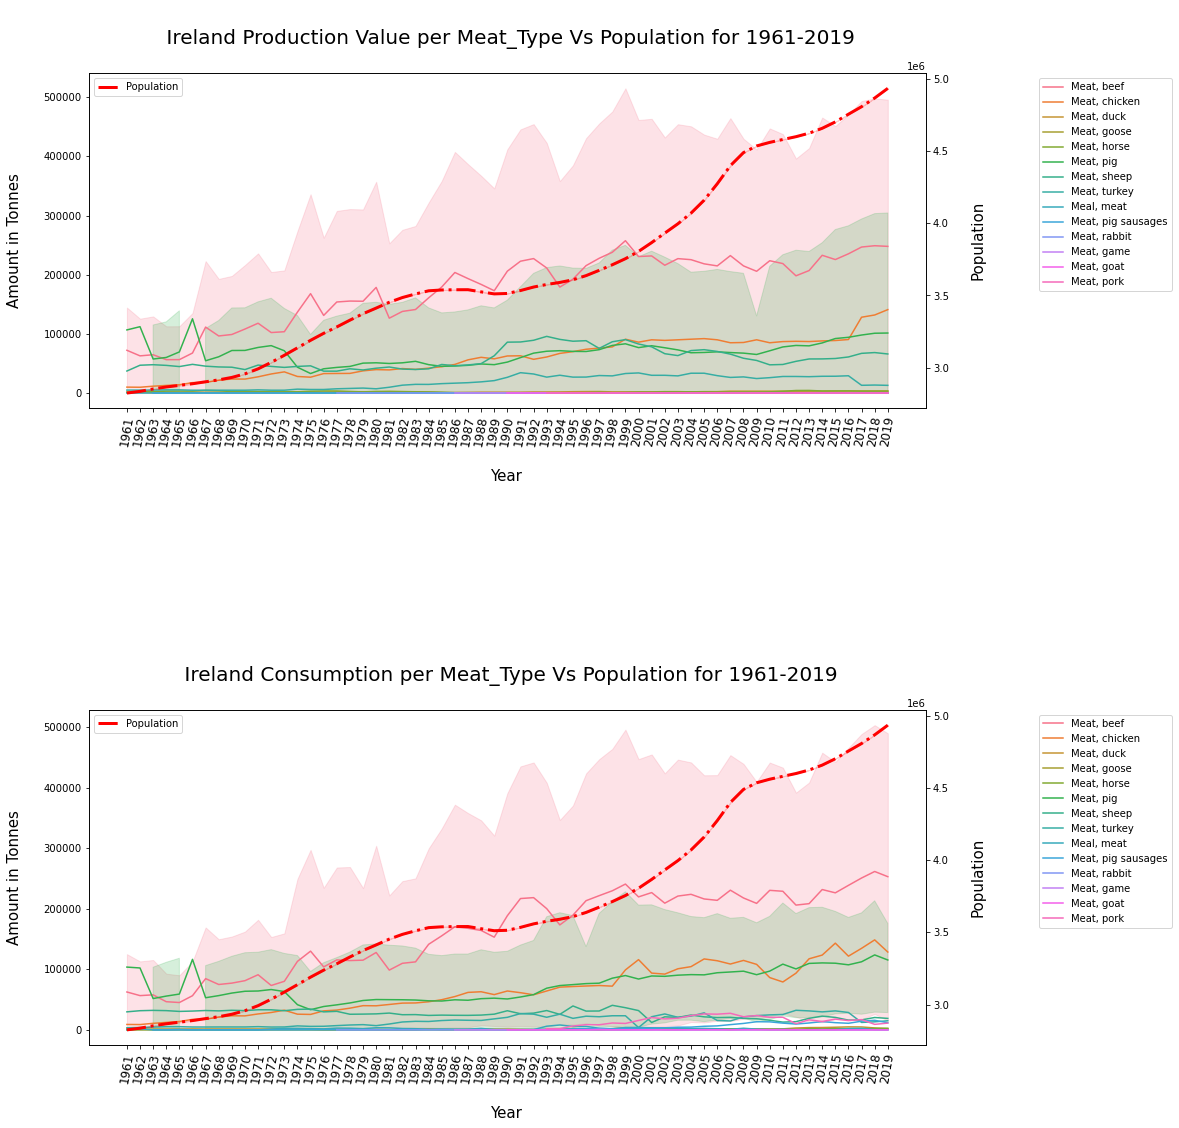

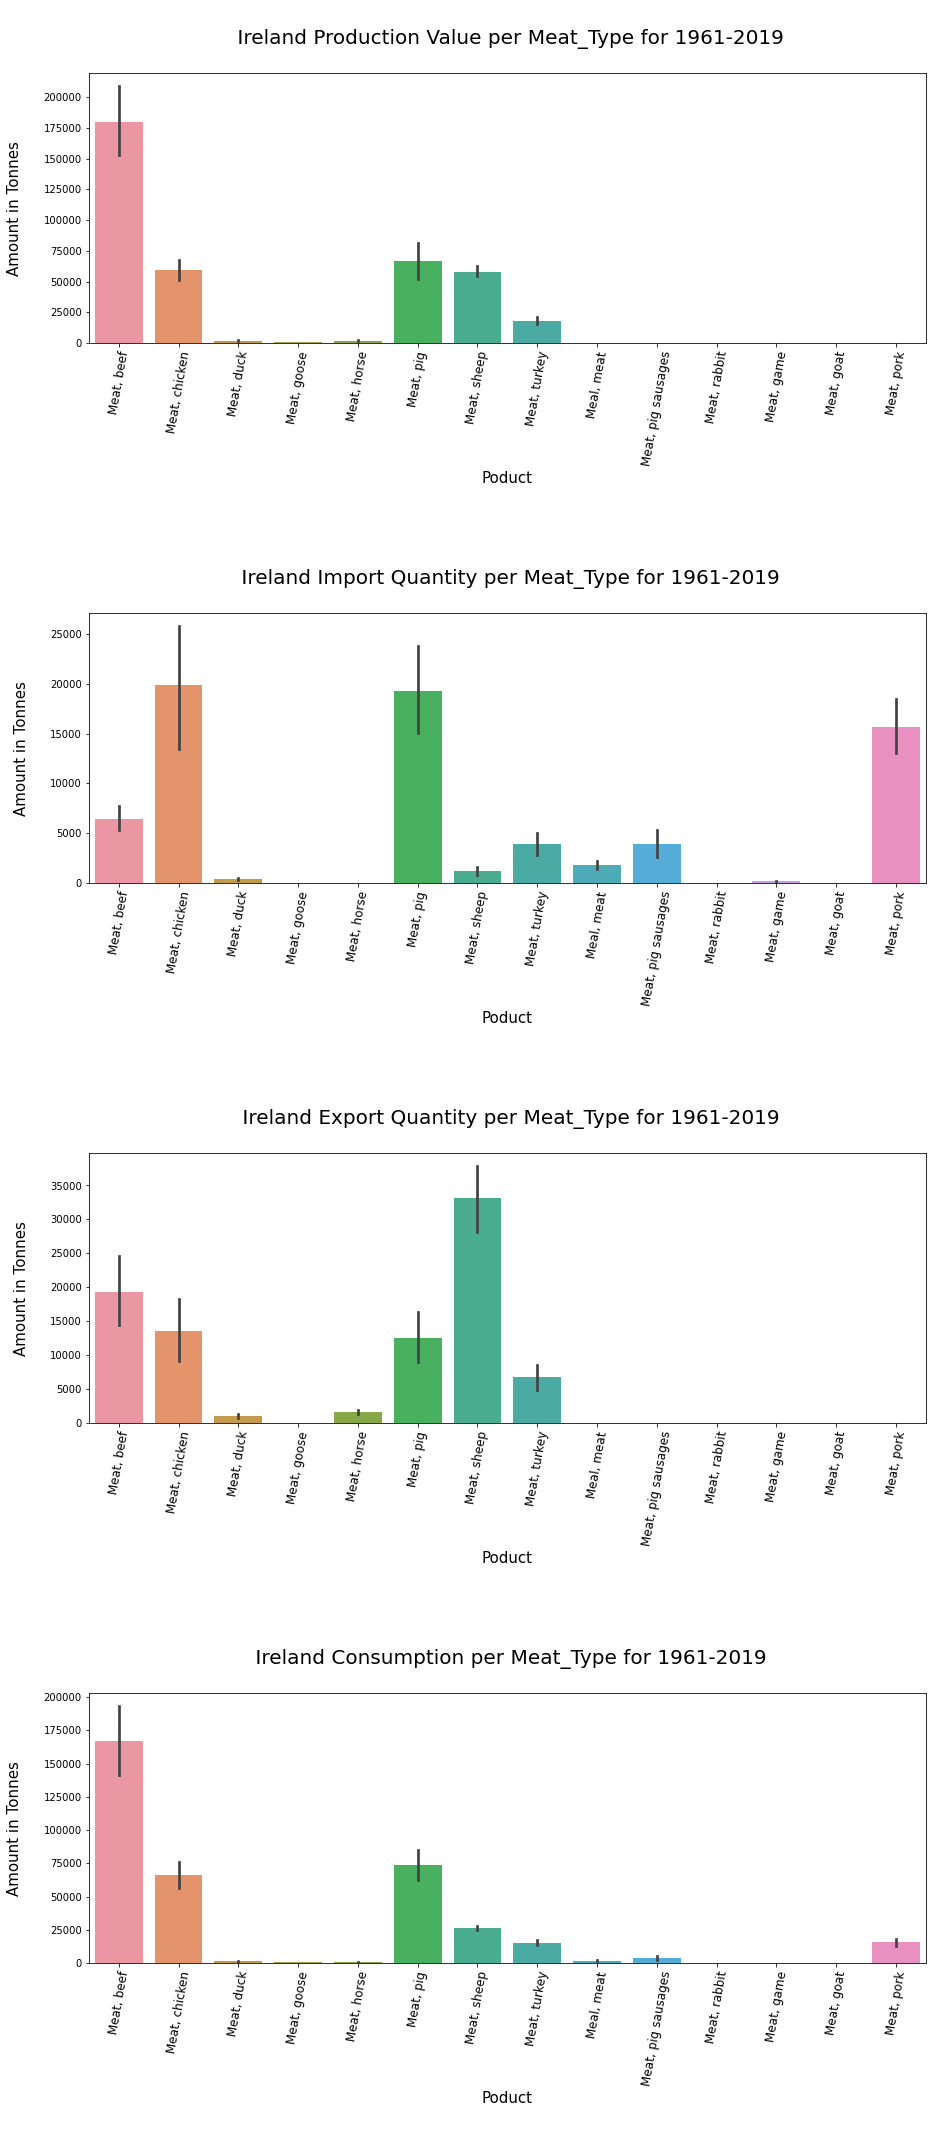

In [92]:
plotlinegraphs(ireland_meat, 'Meat_Type', 'Ireland ', 'Population_Ireland',);
plotfigures(ireland_meat, 'Meat_Type');

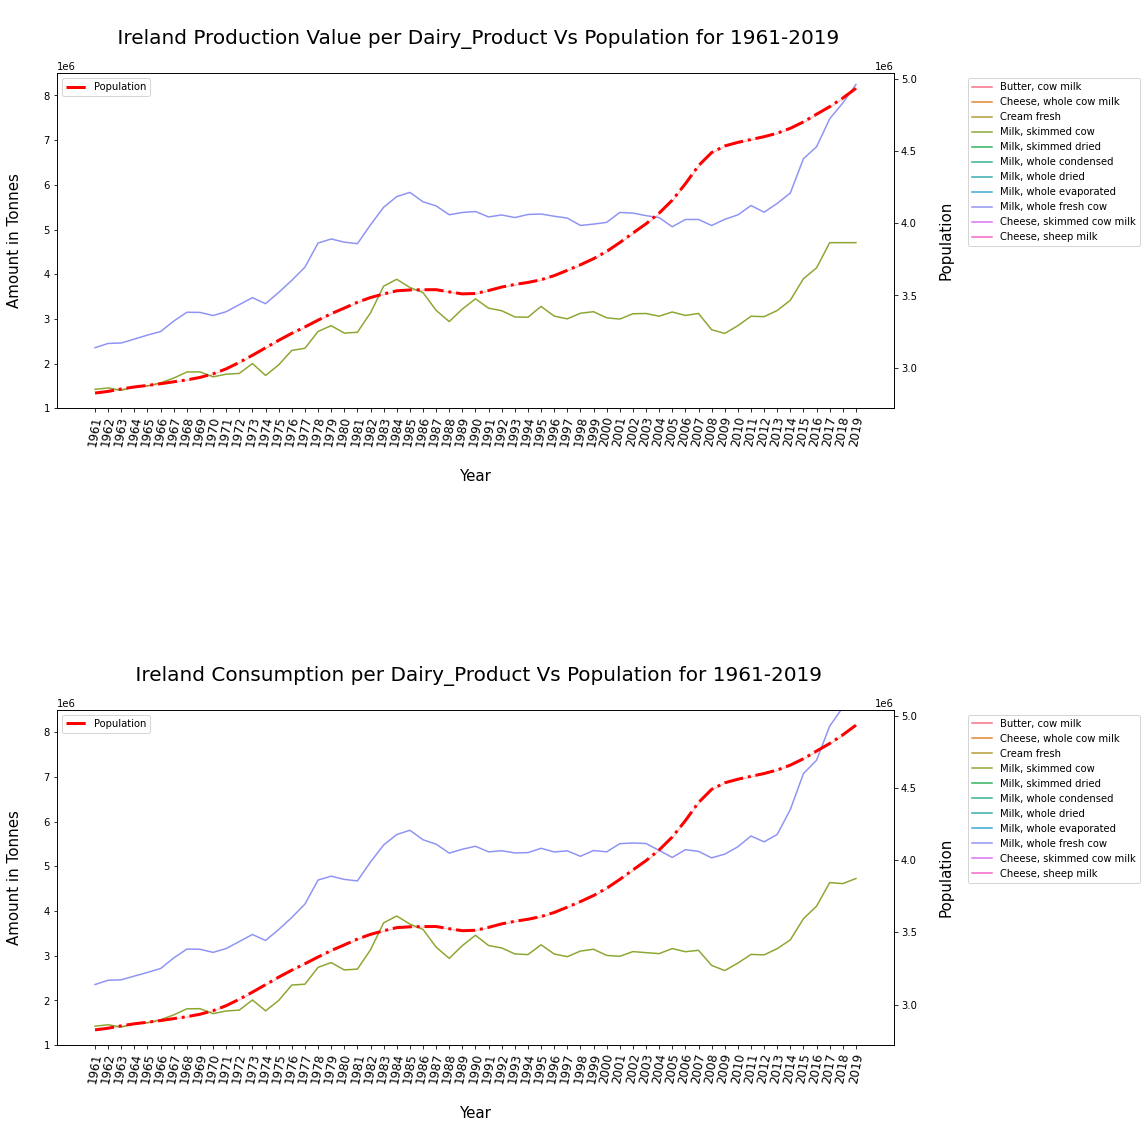

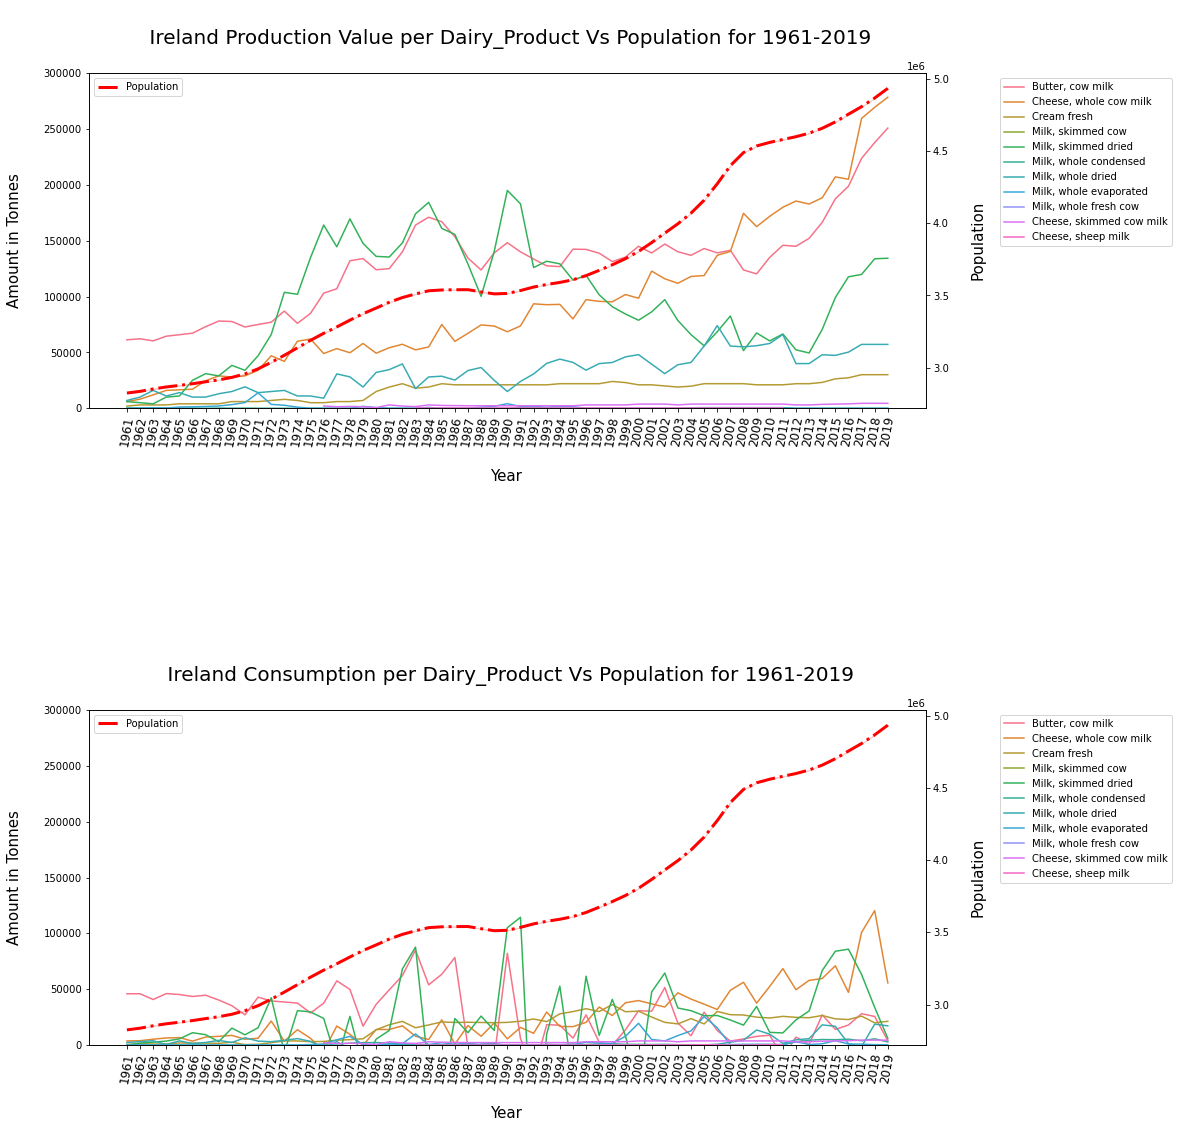

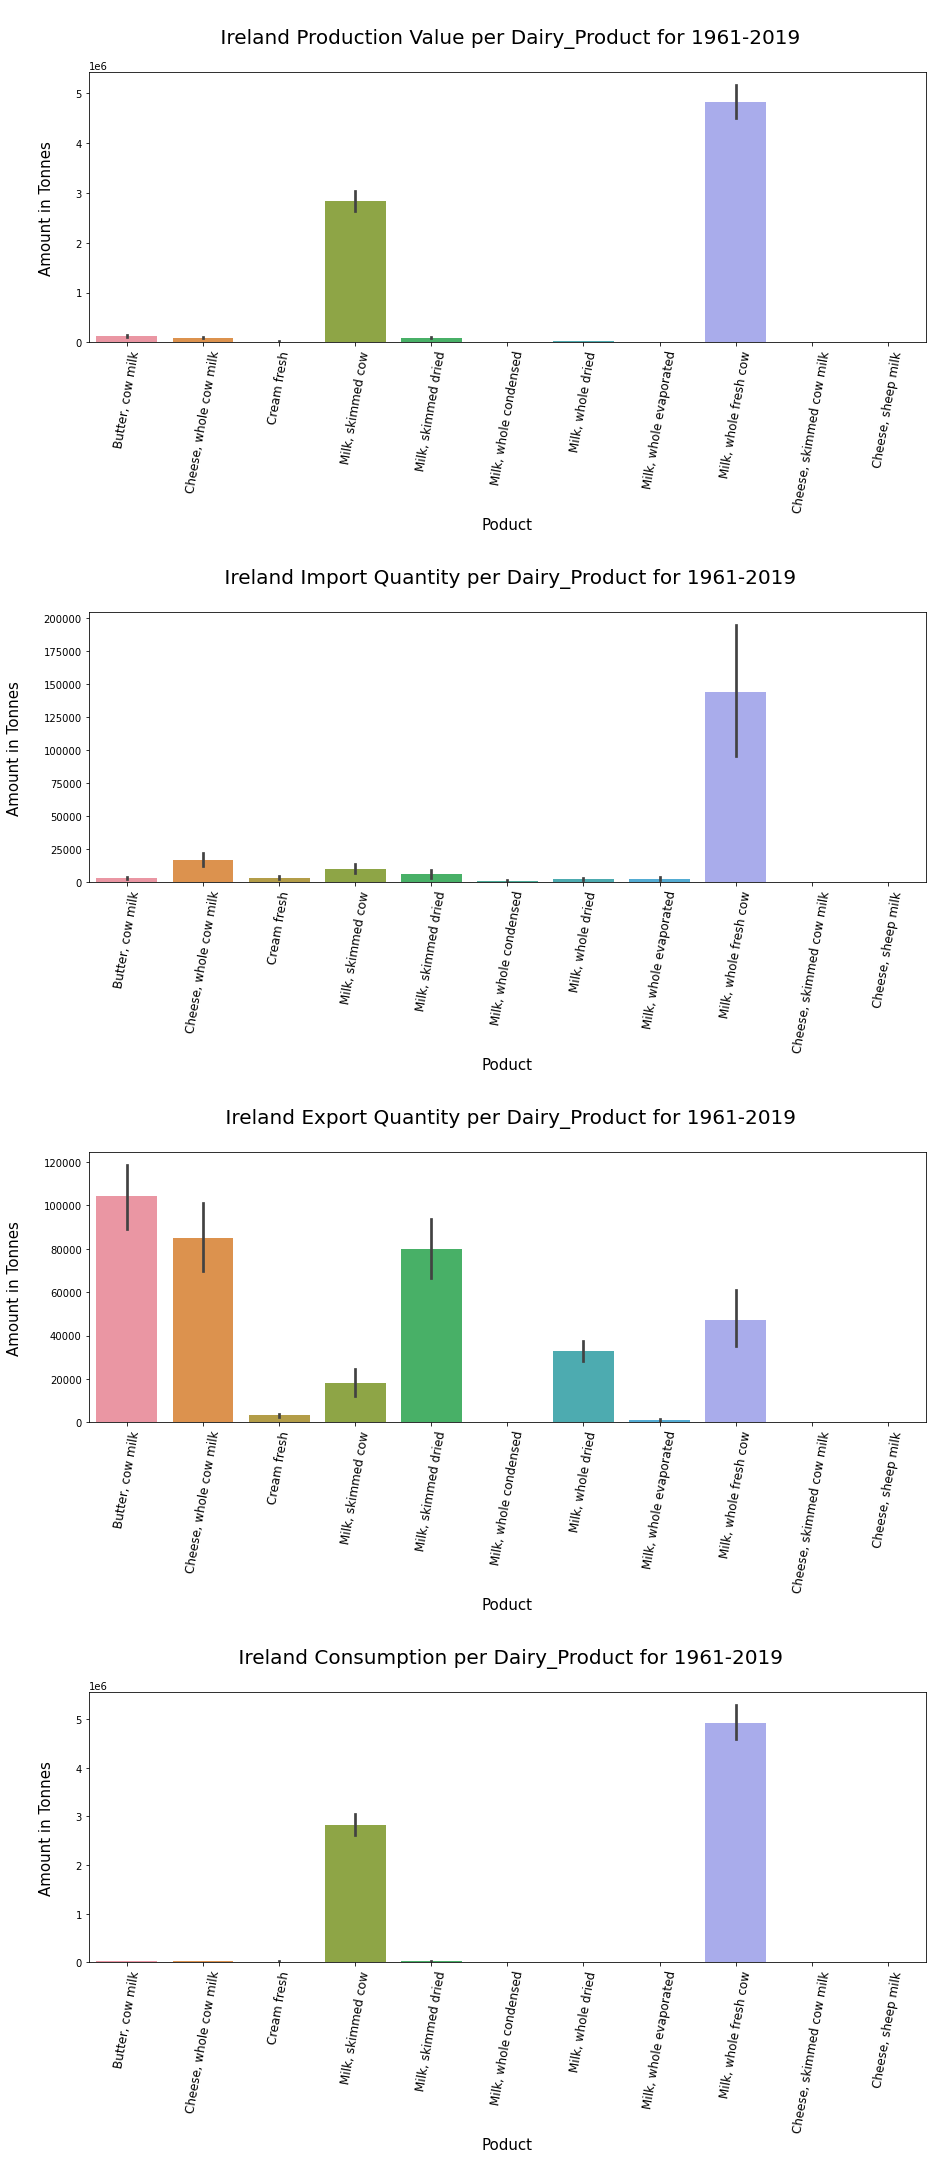

In [83]:
plotlinegraphsii(ireland_dairy, 'Dairy_Product', 1000000, 8500000, 'Ireland ', 'Population_Ireland', 'Top ')
plotlinegraphsii(ireland_dairy, 'Dairy_Product', 0, 300000, 'Ireland ', 'Population_Ireland', 'Other ')
plotfigures(ireland_dairy, 'Dairy_Product');

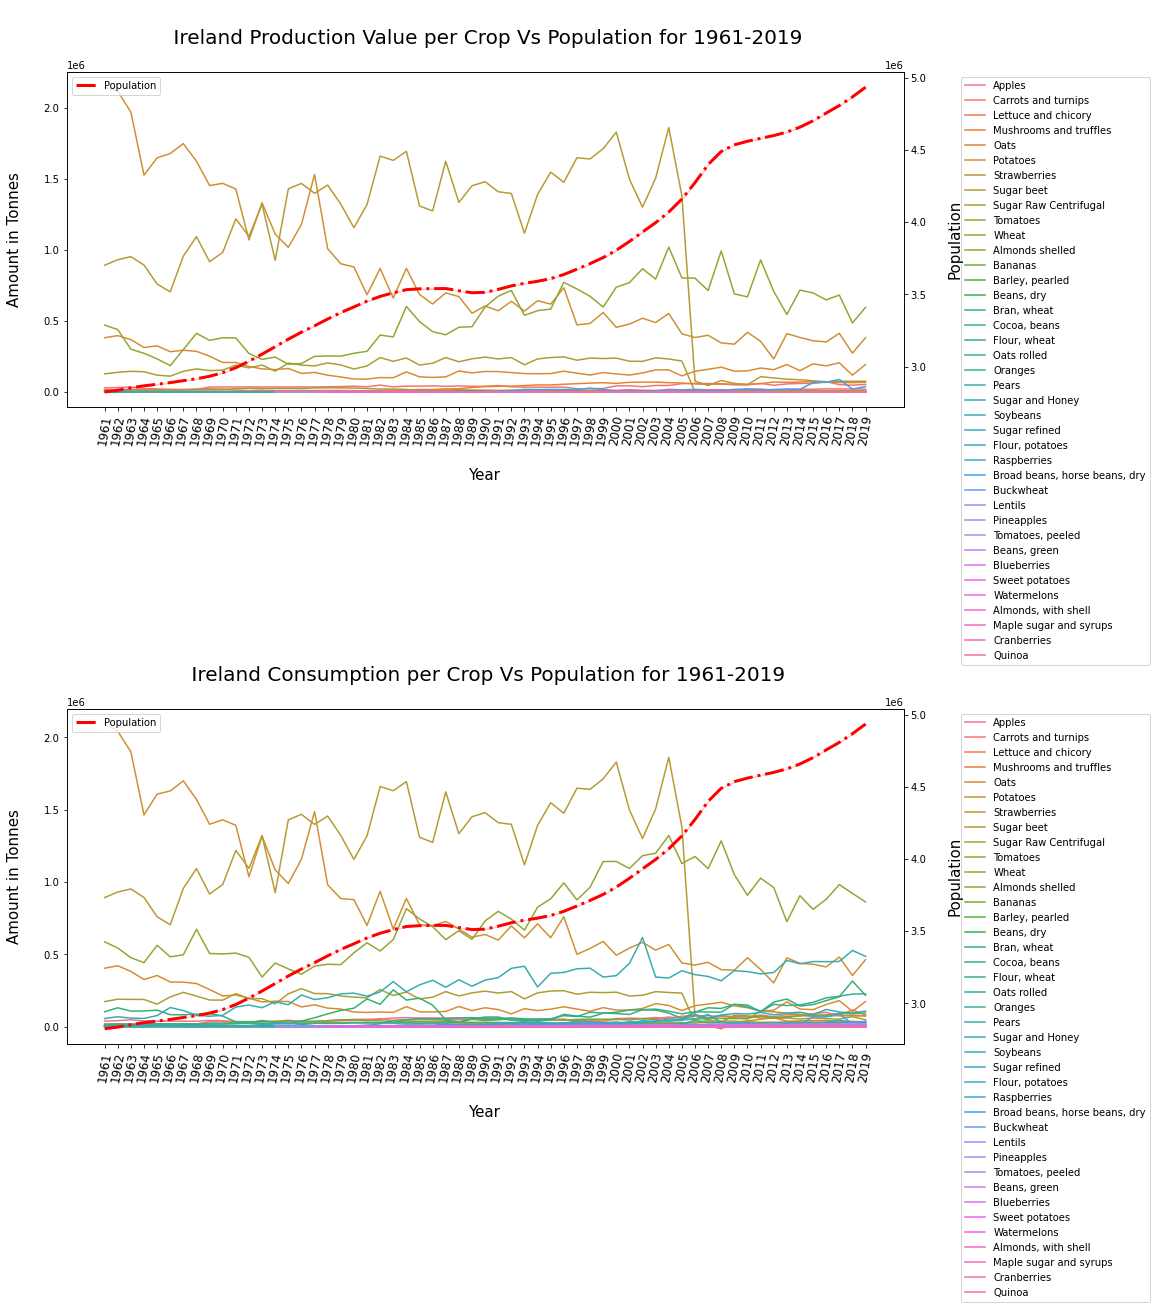

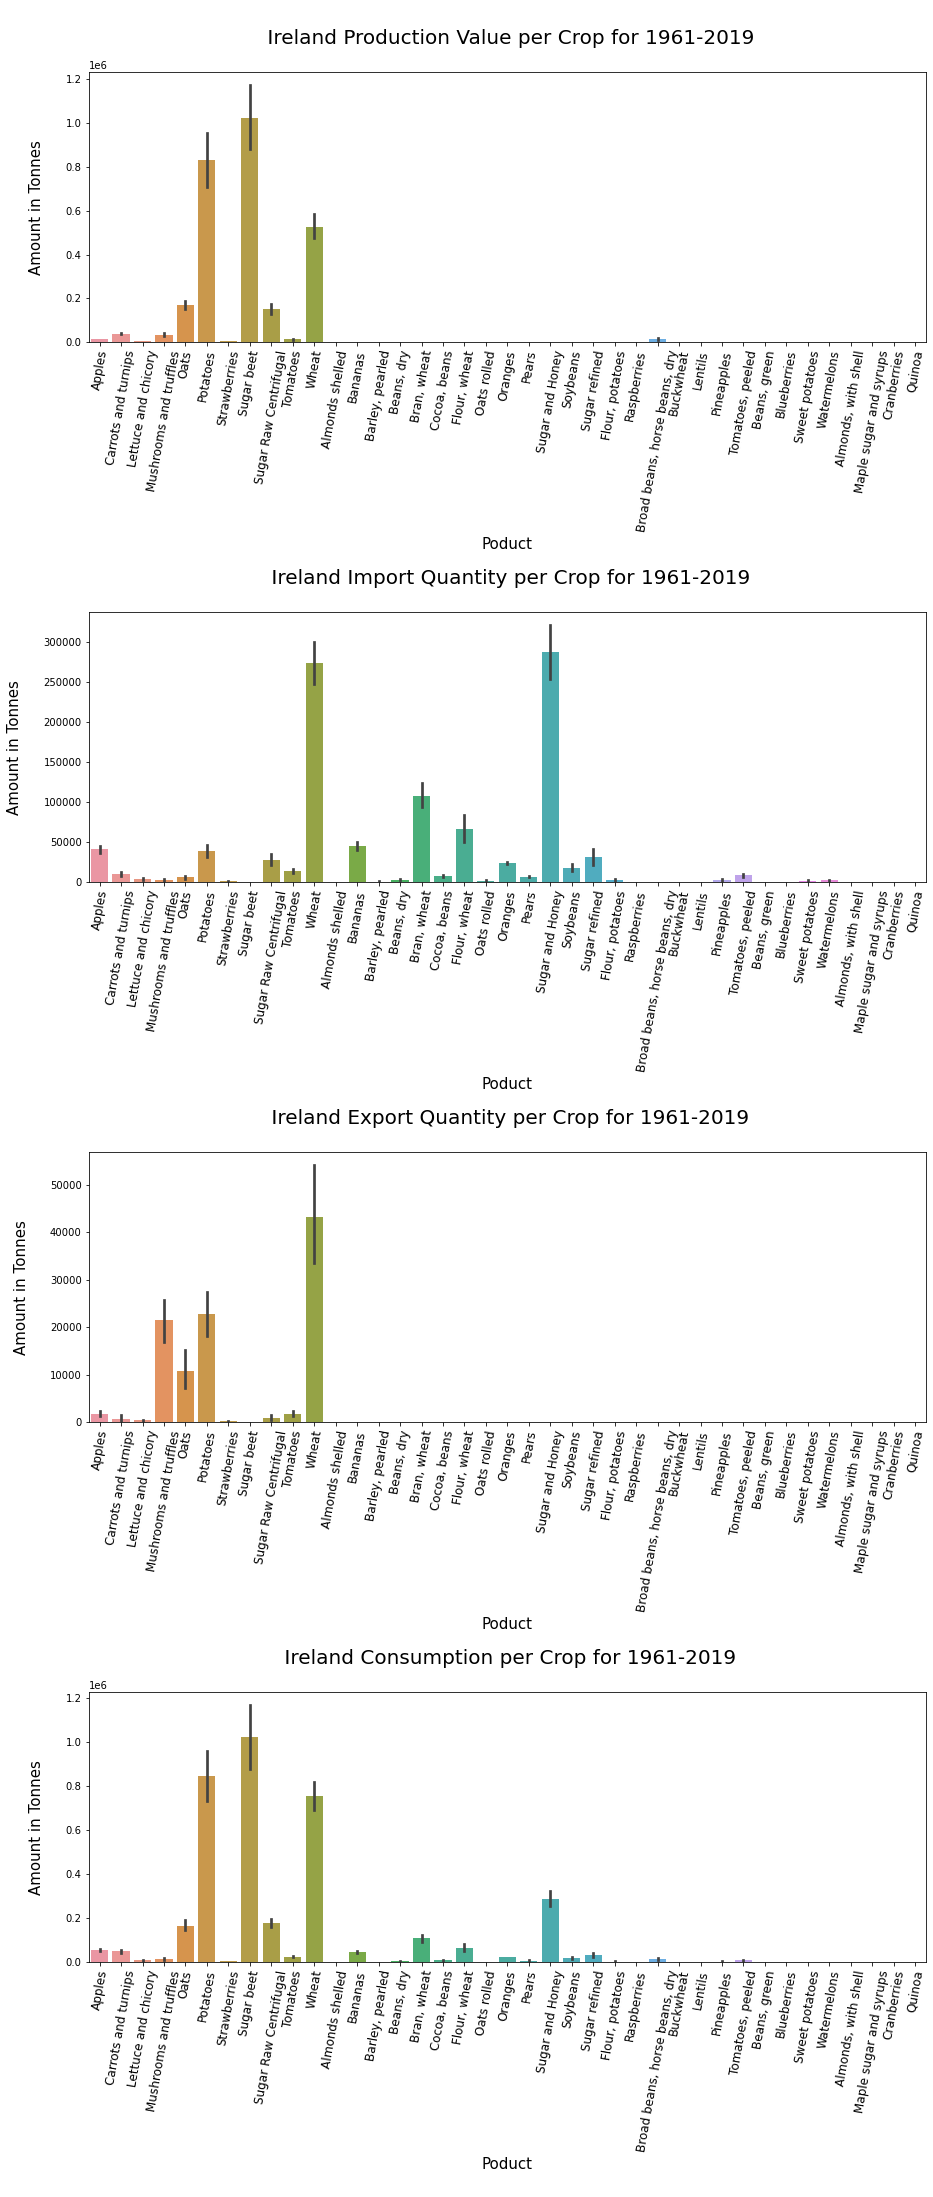

In [84]:
plotlinegraphs(ireland_crop, 'Crop', 'Ireland ', 'Population_Ireland');
plotfigures(ireland_crop, 'Crop');

### Ireland Production Pivot Table

In [85]:
#ireland_dairy_prod as a pivot table to see dairy poduct values per year

ireland_meat_table = pd.pivot_table(ireland_meat, values='Production Value', index=['Prod Country', 'Year'],
                    columns=['Meat_Type'], aggfunc=np.sum, fill_value=0)


ireland_dairy_table = pd.pivot_table(ireland_dairy, values='Production Value', index=['Prod Country', 'Year'],
                    columns=['Dairy_Product'], aggfunc=np.sum, fill_value=0)


ireland_crop_table = pd.pivot_table(ireland_crop, values='Production Value', index=['Prod Country', 'Year'],
                    columns=['Crop'], aggfunc=np.sum, fill_value=0)

In [86]:
ireland_meat_table

Meat_Type          Meal, meat  Meat, beef  Meat, chicken  Meat, duck  \
Prod Country Year                                                      
Ireland      1961           0      289078          10000        1400   
             1962           0      251378           9800        1200   
             1963           0      259026          11600        1000   
             1964           0      225596          12880        1000   
             1965           0      225886          14050        1000   
             1966           0      270514          17580        1400   
             1967           0      445914          18020        1200   
             1968           0      385898          21760        1200   
             1969           0      395910          23700        1200   
             1970           0      432678          23600        1200   
             1971           0      472080          27430        1200   
             1972           0      409014          32240        1200   
             1973           0      414600          35800        1600   
             1974           0      684000          28000        1600   
             1975           0      840000          26800        1600   
             1976           0      656000          32880        1400   
             1977           0      769600          33080        2000   
             1978           0      777400          33200        2000   
             1979           0      775800          37500        2000   
             1980           0      892800          39600        2000   
             1981           0      632600          39100        2400   
             1982           0      689800          41400        2200   
             1983           0      706000          40000        2200   
             1984           0      804562          42100        1600   
             1985           0      896452          44500         400   
             1986           0     1018886          48400         800   
             1987           0      967240          56100        1000   
             1988           0      918200          60400        1400   
             1989           0      864800          57800        1400   
             1990           0     1030000          62672        1400   
             1991           0     1114200          63000        1400   
             1992           0     1136400          57000        1800   
             1993           0     1057000          60950        1800   
             1994           0      895600          67000        1900   
             1995           0      962200          70000        2300   
             1996           0     1076800          74000        2500   
             1997           0     1139000          76000        2600   
             1998           0     1189600          78000        2000   
             1999           0     1287600          91000        2000   
             2000           0     1153800          86000        2000   
             2001           0     1158800          90000        2000   
             2002           0     1080000          89000        2400   
             2003           0     1136000          90000        2400   
             2004           0     1127200          91000        2000   
             2005           0     1092000          92000        2400   
             2006           0     1074600          90000        2400   
             2007           0     1161600          85000        3200   
             2008           0     1074600          85450        3200   
             2009           0     1029000          90000        3200   
             2010           0     1118200          85000        3200   
             2011           0     1094200          87000        3200   
             2012           0      990800          87459        3139   
             2013           0     1035200          87046        3112   
             2014           0     116420

In [87]:
ireland_dairy_table

Dairy_Product      Butter, cow milk  Cheese, sheep milk  \
Prod Country Year                                         
Ireland      1961             61300                   0   
             1962             62200                   0   
             1963             60346                   0   
             1964             64500                   0   
             1965             65845                   0   
             1966             67197                   0   
             1967             73000                   0   
             1968             78069                   0   
             1969             77674                   0   
             1970             72752                   0   
             1971             75000                   0   
             1972             77043                   0   
             1973             87000                   0   
             1974             76000                   0   
             1975             85000                   0   
             1976            103000                   0   
             1977            107000                   0   
             1978            132000                   0   
             1979            134000                   0   
             1980            124000                   0   
             1981            125000                   0   
             1982            140000                   0   
             1983            164000                   0   
             1984            171000                   0   
             1985            167000                   0   
             1986            153496                   0   
             1987            134394                   0   
             1988            123800                   0   
             1989            139100                   0   
             1990            148200                   0   
             1991            140000                   0   
             1992            133600                   0   
             1993            127500                   0   
             1994            126800                   0   
             1995            142400                   0   
             1996            142200                   0   
             1997            138800                   0   
             1998            131300                   0   
             1999            135300                   0   
             2000            145000                   0   
             2001            139000                   0   
             2002            147000                   0   
             2003            140100                   0   
             2004            136900                   0   
             2005            143000                   0   
             2006            139100                   0   
             2007            141400                   0   
             2008            123800                   0   
             2009            120300                   0   
             2010            135100                   0   
             2011            145900                   0   
             2012            145000                   0   
             2013            152100                   0   
             2014            166370                   0   
             2015            187490                   0   
             2016            198700                   0   
             2017            223700                   0   
             2018            237800                   0   
             2019            250800                   0   

Dairy_Product      Cheese, skimmed cow milk  Cheese, whole cow milk  \
Prod Country Year                                                     
Ireland      1961                         0                    6000   
             1962                         0                    8165   
             1963                         0                   12000   
             1964                         0  

In [88]:
ireland_crop_table

Crop               Almonds shelled  Almonds, with shell  Apples  Bananas  \
Prod Country Year                                                          
Ireland      1961                0                    0   29000        0   
             1962                0                    0   31000        0   
             1963                0                    0   35000        0   
             1964                0                    0   24000        0   
             1965                0                    0   21000        0   
             1966                0                    0   17000        0   
             1967                0                    0   16000        0   
             1968                0                    0   20000        0   
             1969                0                    0   22000        0   
             1970                0                    0   20000        0   
             1971                0                    0   13000        0   
             1972                0                    0    9100        0   
             1973                0                    0   11900        0   
             1974                0                    0   10000        0   
             1975                0                    0   10300        0   
             1976                0                    0   10800        0   
             1977                0                    0    9800        0   
             1978                0                    0   10100        0   
             1979                0                    0   10000        0   
             1980                0                    0    8900        0   
             1981                0                    0    6500        0   
             1982                0                    0    9000        0   
             1983                0                    0   10350        0   
             1984                0                    0   13692        0   
             1985                0                    0   10960        0   
             1986                0                    0    9800        0   
             1987                0                    0   10400        0   
             1988                0                    0   10400        0   
             1989                0                    0   11700        0   
             1990                0                    0   10600        0   
             1991                0                    0   10300        0   
             1992                0                    0    8100        0   
             1993                0                    0    8100        0   
             1994                0                    0   11500        0   
             1995                0                    0   11800        0   
             1996                0                    0   11500        0   
             1997                0                    0    9700        0   
             1998                0                    0    8000        0   
             1999                0                    0   13000        0   
             2000                0                    0   10800        0   
             2001                0                    0   15600        0   
             2002                0                    0   10900        0   
             2003                0                    0    7500        0   
             2004                0                    0   18500        0   
             2005                0                    0   14800        0   
             2006                0                    0   18200        0   
             2007                0                    0   15000        0   
             2008                0                    0   15600        0   
             2009                0                    0   13100        0   
             2010                0                    0   21100        0   
             2011                0              

### Descriptive Statistics per product for all years

The FAO datasets are free of outliers, however, outliers will appear when looking at boxplots per product for all years as this data is presented in Pivot table format and will show 0 values for years where production on an item had not yet started. 

In [93]:
ireland_meat_table.describe().apply(lambda s: s.apply('{0:.2f}'.format))
ireland_dairy_table.describe().apply(lambda s: s.apply('{0:.2f}'.format))
ireland_crop_table.describe().apply(lambda s: s.apply('{0:.2f}'.format))

Meat_Type Meal, meat  Meat, beef Meat, chicken Meat, duck Meat, game  \
count          59.00       59.00         59.00      59.00      59.00   
mean            0.00   860576.14      59700.63    2027.85       0.00   
std             0.00   320058.14      32417.78     815.03       0.00   
min             0.00   225596.00       9800.00     400.00       0.00   
25%             0.00   670000.00      32980.00    1400.00       0.00   
50%             0.00   967240.00      60400.00    2000.00       0.00   
75%             0.00  1122700.00      87252.50    2450.00       0.00   
max             0.00  1287600.00     141000.00    3463.00       0.00   

Meat_Type Meat, goat Meat, goose Meat, horse  Meat, pig Meat, pig sausages  \
count          59.00       59.00       59.00      59.00              59.00   
mean            0.00      895.58     2143.64  183311.92               0.00   
std             0.00      256.60     1169.25   54731.48               0.00   
min             0.00      640.00       49.00   99000.00               0.00   
25%             0.00      640.00     1425.00  139798.50               0.00   
50%             0.00      760.00     2119.00  160900.00               0.00   
75%             0.00     1200.00     3164.00  219350.00               0.00   
max             0.00     1280.00     4483.00  304370.00               0.00   

Meat_Type Meat, pork Meat, rabbit Meat, sheep Meat, turkey  
count          59.00        59.00       59.00        59.00  
mean            0.00         0.00    58237.20     18388.15  
std             0.00         0.00    17314.02     10845.82  
min             0.00         0.00    37000.00      4800.00  
25%             0.00         0.00    44874.00      6300.00  
50%             0.00         0.00    49700.00     17500.00  
75%             0.00         0.00    69355.00     28377.00  
max             0.00         0.00    95800.00     34400.00

Dairy_Product Butter, cow milk Cheese, sheep milk Cheese, skimmed cow milk  \
count                    59.00              59.00                    59.00   
mean                 128565.69               0.00                  2177.15   
std                   42503.10               0.00                  1508.31   
min                   60346.00               0.00                     0.00   
25%                   95000.00               0.00                   300.00   
50%                  135100.00               0.00                  2250.00   
75%                  145000.00               0.00                  3750.00   
max                  250800.00               0.00                  4435.00   

Dairy_Product Cheese, whole cow milk Cream fresh Milk, skimmed cow  \
count                          59.00       59.00             59.00   
mean                        94560.46    16555.75        2838690.03   
std                         67146.03     8429.71         837199.85   
min                          6000.00     2000.00        1402856.00   
25%                         49500.00     6500.00        2148370.00   
50%                         74600.00    21000.00        3043344.00   
75%                        120800.00    22000.00        3189420.00   
max                        278400.00    30064.00        4706000.00   

Dairy_Product Milk, skimmed dried Milk, whole condensed Milk, whole dried  \
count                       59.00                 59.00             59.00   
mean                     95745.03                143.90          33092.46   
std                      50922.80                242.05          17037.72   
min                       4000.00                  0.00           7000.00   
25%                      58100.00                  0.00          16000.00   
50%                      99100.00                  0.00          33800.00   
75%                     134650.00                195.00          45000.00   
max                     195000.00               1080.00          74000.00   

Dairy_Product Milk, whole evaporated Milk, whole fresh cow  
count                          59.00                 59.00  
mean                          910.59            4830551.66  
std                          2062.49            1322615.23  
min                             0.00            2356000.00  
25%                             0.00            3727850.00  
50%                             0.00            5228300.00  
75%                          1207.50            5384785.00  
max                         13825.00            8244870.00

Crop  Almonds shelled Almonds, with shell    Apples Bananas Barley, pearled  \
count           59.00               59.00     59.00   59.00           59.00   
mean             0.00                0.00  14655.78    0.00            0.00   
std              0.00                0.00   6071.55    0.00            0.00   
min              0.00                0.00   6500.00    0.00            0.00   
25%              0.00                0.00  10300.00    0.00            0.00   
50%              0.00                0.00  12100.00    0.00            0.00   
75%              0.00                0.00  19200.00    0.00            0.00   
max              0.00                0.00  35000.00    0.00            0.00   

Crop  Beans, dry Beans, green Blueberries Bran, wheat  \
count      59.00        59.00       59.00       59.00   
mean      313.56       945.15        0.00        0.00   
std      1393.89       930.98        0.00        0.00   
min         0.00         0.00        0.00        0.00   
25%         0.00         0.00        0.00        0.00   
50%         0.00      1400.00        0.00        0.00   
75%         0.00      1700.00        0.00        0.00   
max      7800.00      3500.00        0.00        0.00   

Crop  Broad beans, horse beans, dry  ... Strawberries Sugar Raw Centrifugal  \
count                         59.00  ...        59.00                 59.00   
mean                       10369.95  ...      4376.64             151107.08   
std                        17288.09  ...      1462.37              89645.38   
min                            0.00  ...      1000.00                  0.00   
25%                            0.00  ...      3000.00             114500.00   
50%                            0.00  ...      4200.00             188064.00   
75%                        16750.00  ...      5300.00             227500.00   
max                        87527.00  ...      7900.00             247000.00   

Crop  Sugar and Honey  Sugar beet Sugar refined Sweet potatoes  Tomatoes  \
count           59.00       59.00         59.00          59.00     59.00   
mean             0.00  1024068.02          0.00           0.00  12784.83   
std              0.00   590359.84          0.00           0.00   7521.78   
min              0.00    45000.00          0.00           0.00   3730.00   
25%              0.00   731747.50          0.00           0.00   7000.00   
50%              0.00  1274000.00          0.00           0.00  11050.00   
75%              0.00  1462000.00          0.00           0.00  16783.50   
max              0.00  1861400.00          0.00           0.00  29000.00   

Crop  Tomatoes, peeled Watermelons       Wheat  
count            59.00       59.00       59.00  
mean              0.00        0.00   527426.76  
std               0.00        0.00   220696.06  
min               0.00        0.00   185300.00  
25%               0.00        0.00   331700.00  
50%               0.00        0.00   539000.00  
75%               0.00        0.00   702250.00  
max               0.00        0.00  1019200.00  

[8 rows x 39 columns]

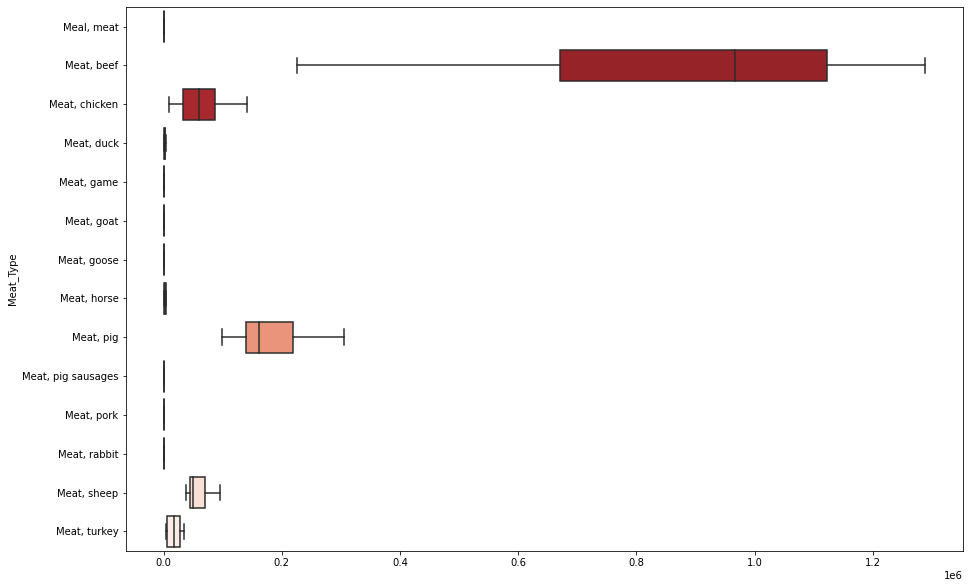

In [94]:
plt.figure(figsize=[15, 10])
sns.boxplot(data=ireland_meat_table, orient='h', palette='Reds_r');

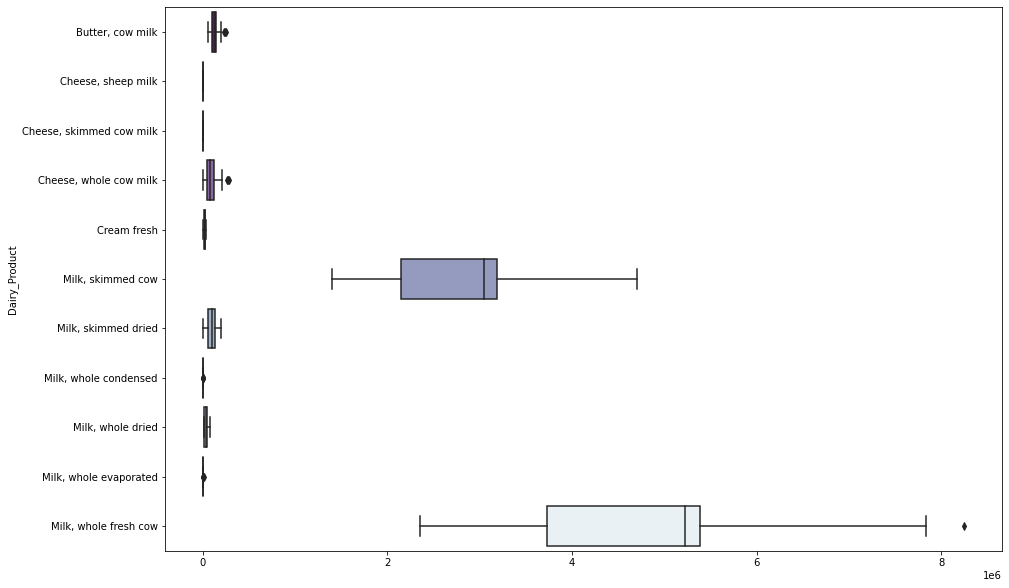

In [95]:
plt.figure(figsize=[15, 10])
sns.boxplot(data=ireland_dairy_table, orient='h', palette='BuPu_r');

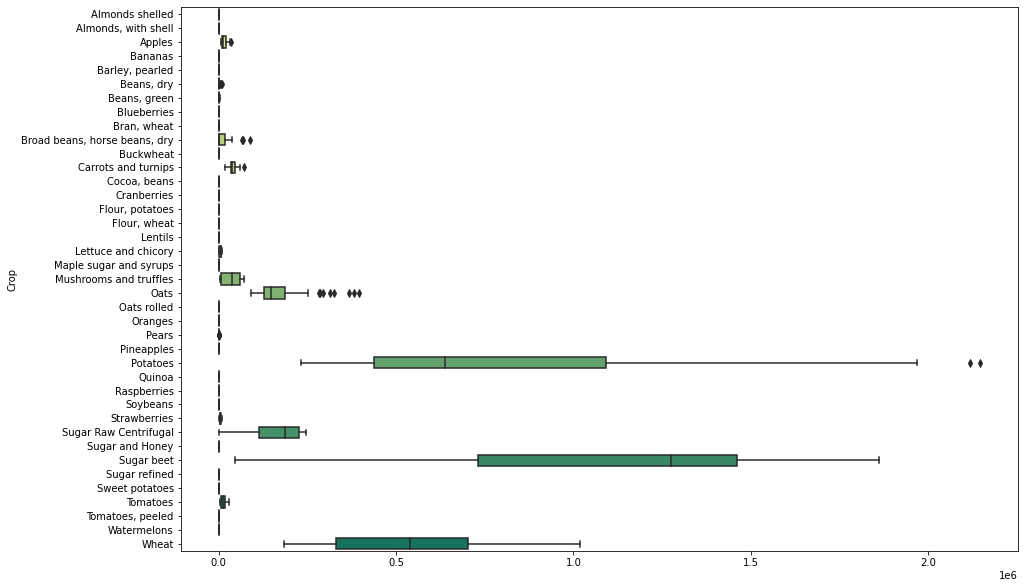

In [96]:
plt.figure(figsize=[15, 10])
sns.boxplot(data=ireland_crop_table, orient='h', palette='summer_r');

In [97]:
ireland_meat_table.columns 

Index(['Meal, meat', 'Meat, beef', 'Meat, chicken', 'Meat, duck', 'Meat, game',
       'Meat, goat', 'Meat, goose', 'Meat, horse', 'Meat, pig',
       'Meat, pig sausages', 'Meat, pork', 'Meat, rabbit', 'Meat, sheep',
       'Meat, turkey'],
      dtype='object', name='Meat_Type')

In [98]:
ireland_meat_columns = ['Meal, meat', 'Meat, beef', 'Meat, chicken', 'Meat, duck', 'Meat, game',
       'Meat, goat', 'Meat, goose', 'Meat, horse', 'Meat, pig',
       'Meat, pig sausages', 'Meat, pork', 'Meat, rabbit', 'Meat, sheep', 'Meat, turkey']

LinAlgError: singular matrix

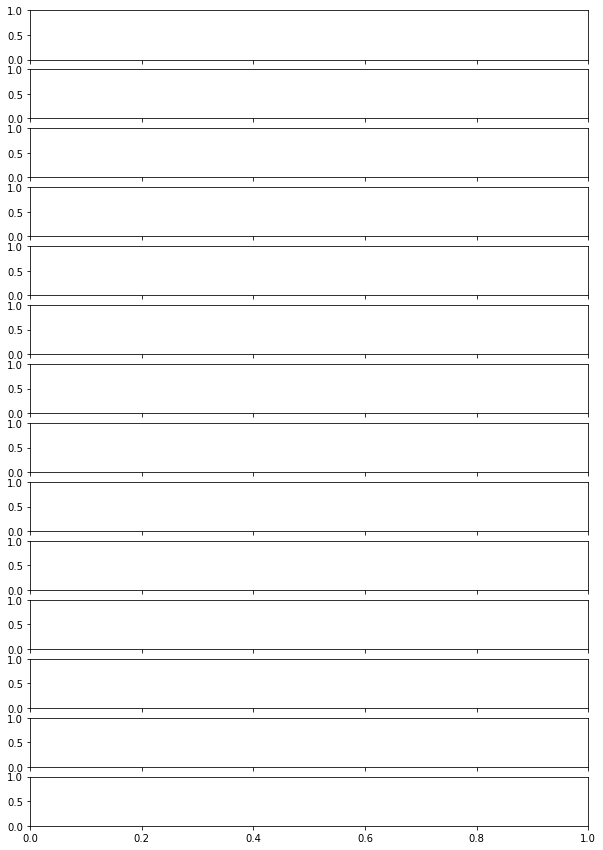

In [105]:
# Histogram for pedestrian 2019 and 2020
ireland_meat_table[ireland_meat_columns].plot(kind='density', subplots=True, figsize=(10,15));

In [ ]:
mask = np.triu(np.ones_like(ireland_meat_prod_table.corr(), dtype=bool))
sns.heatmap(ireland_meat_prod_table.corr(), annot=True, vmax=1, vmin=-1, center=0, mask = mask, cmap='vlag')
plt.show();

In [ ]:
mask = np.triu(np.ones_like(ireland_dairy_prod_table.corr(), dtype=bool))
sns.heatmap(ireland_dairy_prod_table.corr(), annot=True, vmax=1, vmin=-1, center=0, mask = mask, cmap='vlag')
plt.show();

In [ ]:
mask = np.triu(np.ones_like(ireland_crop_prod_table.corr(), dtype=bool))
sns.heatmap(ireland_crop_prod_table.corr(), annot=True, vmax=1, vmin=-1, center=0, mask = mask, cmap='vlag')
plt.show();

## GERMANY

 ## Germany Production Datasets

In [ ]:
# create german dataset
germany_prod_df = europe_melt.loc[europe_melt['Country']=='Germany']

# german production dataset - all products (crop, meat, livestock)
germany_prod = germany_prod_df.loc[germany_prod_df['Element']=='Production']

#reset index
germany_prod.reset_index(drop=True, inplace=True)

germany_prod

### Germany Missing Values 

In [ ]:
#ireland_prod as a pivot table to see what values we need to replace for 2018/2019 only

germany_prod_table = pd.pivot_table(germany_prod, values='Value', index=['Country', 'Element', 'Unit', 'Year'],
                    columns=['Crop_Livestock'], aggfunc=np.sum, fill_value=0)
germany_prod_table

In [ ]:
# search tab to identify what 2018/2019 data to be replaces & identify iloc 
germany_prod.loc[germany_prod['Crop_Livestock']=='Treenuts, Total']

In [ ]:
# replace missing 2018/ 2019 values with last recorded value 

germany_prod.iloc[[9463, 9629],[5]] = 227.0
germany_prod.iloc[[9478, 9644],[5]] = 2040.0
germany_prod.iloc[[9479, 9645],[5]] = 791400.0
germany_prod.iloc[[9480, 9646],[5]] = 1484200.0
germany_prod.iloc[[9499, 9665],[5]] = 2703.0
germany_prod.iloc[[9501, 9667],[5]] = 86160.0
germany_prod.iloc[[9510, 9676],[5]] = 21600.0
germany_prod.iloc[[9526, 9692],[5]] = 58400.0
germany_prod.iloc[[9531, 9697],[5]] = 32532.0
germany_prod.iloc[[9534, 9700],[5]] = 13800937.0
germany_prod.iloc[[9535, 9701],[5]] = 430400.0
germany_prod.iloc[[9536, 9702],[5]] = 27000.0
germany_prod.iloc[[9537, 9703],[5]] = 37363.0
germany_prod.iloc[[9538, 9704],[5]] = 134800.0
germany_prod.iloc[[9539, 9705],[5]] = 376407.0
germany_prod.iloc[[9546, 9712],[5]] = 8194.0
germany_prod.iloc[[9561, 9727],[5]] = 12851.0
germany_prod.iloc[[9567, 9733],[5]] = 91603.0
germany_prod.iloc[[9569, 9735],[5]] = 562.0
germany_prod.iloc[[9574, 9740],[5]] = 2905.0
germany_prod.iloc[[9576, 9742],[5]] = 13141.0
germany_prod.iloc[[9591, 9757],[5]] = 38164.0
germany_prod.iloc[[9593, 9759],[5]] = 6218.0
germany_prod.iloc[[9599, 9765],[5]] = 18261.0
germany_prod.iloc[[9602, 9768],[5]] = 29446.0
germany_prod.iloc[[9603, 9769],[5]] = 345200.0
germany_prod.iloc[[9626, 9792],[5]] = 18261.0

In [ ]:
# drop all rows with NaN and 0 values

# first will replace 0 values with NaNs  
germany_prod.replace(to_replace = 0, value = np.nan, inplace=True)

# row = 0, column = 1
germany_prod = ireland_prod.dropna(axis=0)

# check if we have any NaN values in our dataset
germany_prod.isnull().values.any()

### Germany Production- Add Population

In [ ]:
# merge population data. Outer merge so no data is lost 
germany_prod_pop = pd.merge(germany_prod, germany_pop, how="outer", on = ["Year"])
germany_prod_pop.head()

In [ ]:
germany_prod_pop.shape

In [ ]:
# cast value as int 
germany_prod_pop['Value'] = germany_prod_pop['Value'].astype('int')

###  Germany Meat/ Dairy/ Crop Production

In [ ]:
# german production meat products
germany_meat_prod = germany_prod_pop.loc[germany_prod_pop['Crop_Livestock'].str.contains('meat', case=False)]
germany_meat_prod.rename(columns={'Crop_Livestock': 'Meat Type'}, inplace=True)
germany_meat_prod.reset_index(drop=True)

# german production dairy products
germany_dairy_prod =  germany_prod_pop.loc[ germany_prod_pop['Crop_Livestock'].str.contains('milk', case=False)]
germany_dairy_prod.rename(columns={'Crop_Livestock': 'Dairy Product'}, inplace=True)
germany_dairy_prod.reset_index(drop=True)

# german production crops
germany_crop_prod = germany_prod_pop.loc[germany_prod_pop['Crop_Livestock'].str.contains('meat', case=False) == False]
germany_crop_prod = germany_crop_prod.loc[germany_crop_prod['Crop_Livestock'].str.contains('milk', case=False) == False]
germany_crop_prod = germany_crop_prod.loc[germany_crop_prod['Crop_Livestock'].str.contains('offals', case=False) == False]
germany_crop_prod = germany_crop_prod.loc[germany_crop_prod['Crop_Livestock'].str.contains('fat', case=False) == False]
germany_crop_prod = germany_crop_prod.loc[germany_crop_prod['Crop_Livestock'].str.contains('hides', case=False) == False]
germany_crop_prod = germany_crop_prod.loc[germany_crop_prod['Crop_Livestock'].str.contains('wool', case=False) == False]
germany_crop_prod = germany_crop_prod.loc[germany_crop_prod['Crop_Livestock'].str.contains('sheep', case=False) == False]
germany_crop_prod = germany_crop_prod.loc[germany_crop_prod['Crop_Livestock'].str.contains('cream', case=False) == False]
germany_crop_prod = germany_crop_prod.loc[germany_crop_prod['Crop_Livestock'].str.contains('egg', case=False) == False]
germany_crop_prod = germany_crop_prod.loc[germany_crop_prod['Crop_Livestock'].str.contains('lard', case=False) == False]
germany_crop_prod.rename(columns={'Crop_Livestock': 'Crop'}, inplace=True)
germany_crop_prod.reset_index(drop=True)


In [ ]:
# Rename 2015 Columns
# dcc_2015_ff.rename(columns={' O_Connell_St_Outside_Clerys': 'OConnell_St_Clerys'}, inplace=True)

## Germany Trade Datasets

In [ ]:
# create german dataset
germany_trade = europe_trade_df.loc[europe_trade_df['Country']=='Germany']

# german import/ export datasets - all products (crop, meat, livestock)
germany_imports = germany_trade.loc[germany_trade['Element']=='Import Quantity']
germany_exports = germany_trade.loc[germany_trade['Element']=='Export Quantity']

#reset index
germany_imports.reset_index(drop=True)
germany_exports.reset_index(drop=True)

In [ ]:
# merge population data. Outer merge so no data is lost 
germany_imports = pd.merge(germany_imports, germany_pop, how="outer", on = ["Year"])
germany_exports = pd.merge(germany_exports, germany_pop, how="outer", on = ["Year"])

germany_imports.head()
germany_exports.head()

In [ ]:
germany_imports.shape
germany_exports.shape

### Germany Livestock/ Meat / Dairy/ Crops Imports/ Exports

In [ ]:
# import/ export livestock
germany_livestock_imports = germany_imports.loc[germany_imports['Unit'].str.contains('head', case=False)]
germany_livestock_exports = germany_exports.loc[germany_exports['Unit'].str.contains('head', case=False)]
germany_livestock_imports.rename(columns={'Crop_Livestock': 'Animal Type'}, inplace=True)
germany_livestock_exports.rename(columns={'Crop_Livestock': 'Animal Type'}, inplace=True)
germany_livestock_imports.reset_index(drop=True)
germany_livestock_exports.reset_index(drop=True)

# import/ export meat products
germany_meat_imports = germany_imports.loc[germany_imports['Crop_Livestock'].str.contains('meat', case=False)]
germany_meat_exports = germany_exports.loc[germany_exports['Crop_Livestock'].str.contains('meat', case=False)]
germany_meat_imports.rename(columns={'Crop_Livestock': 'Meat Type'}, inplace=True)
germany_meat_exports.rename(columns={'Crop_Livestock': 'Meat Type'}, inplace=True)
germany_meat_imports.reset_index(drop=True)
germany_meat_exports.reset_index(drop=True)

# import/ export dairy products
germany_dairy_imports = germany_imports.loc[germany_imports['Crop_Livestock'].str.contains('milk', case=False)]
germany_dairy_exports = germany_exports.loc[germany_exports['Crop_Livestock'].str.contains('milk', case=False)]
germany_dairy_imports.rename(columns={'Crop_Livestock': 'Dairy Type'}, inplace=True)
germany_dairy_exports.rename(columns={'Crop_Livestock': 'Dairy Type'}, inplace=True)
germany_dairy_imports.reset_index(drop=True)
germany_dairy_exports.reset_index(drop=True)

# import/ export crops
ger_imports_tonnes = germany_imports.loc[germany_imports['Unit'].str.contains('tonne', case=False)]
ger_exports_tonnes = germany_exports.loc[germany_exports['Unit'].str.contains('tonne', case=False)]
germany_crop_imports = ger_imports_tonnes.loc[ger_imports_tonnes['Crop_Livestock'].str.contains('meat', case=False) == False]
germany_crop_exports = ger_exports_tonnes.loc[ger_exports_tonnes['Crop_Livestock'].str.contains('meat', case=False) == False]
germany_crop_imports.rename(columns={'Crop_Livestock': 'Crop Type'}, inplace=True)
germany_crop_exports.rename(columns={'Crop_Livestock': 'Crop Type'}, inplace=True)
germany_crop_imports.reset_index(drop=True)
germany_crop_exports.reset_index(drop=True)



## Oceania Production Dataset

The Oceania Prouction Dataset is taken from faostat and contains annual data on all crops and animal products producted throughout the Oceania region from 1961-2020, measured in tonnes. It also contains information on livestock numbers, yields, areas havested and slaughtering numbers.

Unit Measurements:

    Production = tonnes
    Area harvested = ha
    Yield =	hg/ha
    Stocks = head 
    Slaughter = head
    Yields/ Carcass Weight = 0.1g/An, hg/An
    Milking Animals = head
    Laying = head
    Prod Popultn (bees/honey) = number

"Crop statistics are recorded for 173 products, covering the following categories: Crops Primary, Fibre Crops Primary, Cereals, Coarse Grain, Citrus Fruit, Fruit, Jute Jute-like Fibres, Oilcakes Equivalent, Oil crops Primary, Pulses, Roots and Tubers, Treenuts and Vegetables and Melons. Data are expressed in terms of area harvested, production quantity and yield. The objective is to comprehensively cover production of all primary crops for all countries and regions in the world. Area and production data on cereals relate to crops harvested for dry grain only. Cereal crops harvested for hay or harvested green for food, feed or silage or used for grazing are therefore excluded. Area data relate to harvested area. Some countries report sown or cultivated area only." https://www.fao.org/faostat/en/#data/QCL


In [ ]:
#drop columns not required for analysis
to_drop = ['Area Code','Item Code','Element Code']
oceania.drop(to_drop, inplace=True, axis=1)

### Melt Data

In [ ]:
# melt new dataframe in order to visualise data by street 
oceania_melt = pd.melt(oceania, id_vars=[ 'Area', 'Item', 'Element', 'Unit'])

# rename columns 
columns = [ 'Country', 'Crop_Livestock', 'Element', 'Unit', 'Year', 'Value']
oceania_melt.columns = columns

#remove Y from year
oceania_melt['Year'] = oceania_melt['Year'].str[1:]

#set Year to datetime dtype
#oceania_melt['Year']= pd.to_datetime(europe_melt['Year'])

oceania_melt

In [ ]:
# dataframe shape, number of rows/ columns 
oceania_melt.shape

In [ ]:
oceania_melt.info()

### Missing Values

In [ ]:
# number of missing values 
oceania_melt.isnull().sum()

In [ ]:
#check the amount of 0's in each column
oceania_melt_sparse = (oceania_melt == 0).sum()
oceania_melt_sparse

In [ ]:
# drop all rows with NaN and 0 values

# first will replace 0 values with NaNs  
oceania_melt.replace(to_replace = 0, value = np.nan, inplace=True)

# row = 0, column = 1
oceania_df = oceania_melt.dropna(axis=0)

# check if we have any NaN values in our dataset
oceania_df.isnull().values.any()

In [ ]:
oceania_df.shape

In [ ]:
# cast value as int 
oceania_df['Value'] = oceania_df['Value'].astype('int')

In [ ]:
oceania_df

## Australia Production Datasets

In [ ]:
# create australian dataset
oz_df = oceania_df.loc[oceania_df['Country']=='Australia']

# australian production dataset - all products (crop, meat, livestock)
oz_prod = oz_df.loc[oz_df['Element']=='Production']

#reset index
oz_prod.reset_index(drop=True, inplace=True)

In [ ]:
# merge population data. Outer merge so no data is lost 
oz_prod_pop = pd.merge(oz_prod, aus_pop, how="inner", on = ["Year"])
oz_prod_pop.head()

In [ ]:
oz_prod_pop.shape

### Australia Meat/ Dairy/ Crop Production

In [ ]:
# australian production meat products
oz_meat_prod = oz_prod_pop.loc[oz_prod_pop['Crop_Livestock'].str.contains('meat', case=False)]
oz_meat_prod.rename(columns={'Crop_Livestock': 'Meat Type'}, inplace=True)
oz_meat_prod.reset_index(drop=True)

# australian production dairy products
oz_dairy_prod = oz_prod_pop.loc[oz_prod_pop['Crop_Livestock'].str.contains('milk', case=False)]
oz_dairy_prod.rename(columns={'Crop_Livestock': 'Dairy Product'}, inplace=True)
oz_dairy_prod.reset_index(drop=True)

# australian production crops
oz_crop_prod = oz_prod_pop.loc[oz_prod_pop['Crop_Livestock'].str.contains('meat', case=False) == False]
oz_crop_prod = oz_crop_prod.loc[oz_crop_prod['Crop_Livestock'].str.contains('milk', case=False) == False]
oz_crop_prod.rename(columns={'Crop_Livestock': 'Crop'}, inplace=True)
oz_crop_prod.reset_index(drop=True)

## Oceania Trade Dataset

The Oceania Trade Dataset is taken from faostat and contains annual data on all crop/ livestock/ animal product Imports and Exports throughout the Oceania region from 1961-2020, measured in tonnes and heads. It also contains information on Import and Export values in $1000US.

Import/ Export Quantity Unit Measurements:

    Crops = tonnes
    Livestock = head
    Dairy Products = tonnes
    Meat animal Product = tonnes 

"The food and agricultural trade dataset is collected, processed and disseminated by FAO according to the standard International Merchandise Trade Statistics (IMTS) Methodology. The data is mainly provided by UNSD, Eurostat, and other national authorities as needed. This source data is checked for outliers, trade partner data is used for non-reporting countries or missing cells, and data on food aid is added to take into account total cross-border trade flows."  https://www.fao.org/faostat/en/#data/TCL


In [ ]:
#drop columns not required for analysis
oceania_trade.drop(to_drop, inplace=True, axis=1)

### Melt Data

In [ ]:
# melt new dataframe in order to visualise data by street 
oceania_trade_melt = pd.melt(oceania_trade, id_vars=[ 'Area', 'Item', 'Element', 'Unit'])

# rename columns 
columns = [ 'Country', 'Crop_Livestock', 'Element', 'Unit', 'Year', 'Value']
oceania_trade_melt.columns = columns

#remove Y from year
oceania_trade_melt['Year'] = oceania_trade_melt['Year'].str[1:]

#set Year to datetime dtype
#europe_melt['Year']= pd.to_datetime(europe_melt['Year'])

oceania_trade_melt.head()

In [ ]:
# dataframe shape, number of rows/ columns 
oceania_trade_melt.shape

In [ ]:
oceania_trade_melt.info()

### Missing Values

In [ ]:
# number of missing values 
oceania_trade_melt.isnull().sum()

In [ ]:
#check the amount of 0's in each column
oceania_trade_melt_sparse = (oceania_trade_melt == 0).sum()
oceania_trade_melt_sparse

In [ ]:
# drop all rows with NaN and 0 values

# first will replace 0 values with NaNs  
oceania_trade_melt.replace(to_replace = 0, value = np.nan, inplace=True)

# row = 0, column = 1
oceania_trade_df = oceania_trade_melt.dropna(axis=0)

# check if we have any NaN values in our dataset
oceania_trade_df.isnull().values.any()

In [ ]:
oceania_trade_df.shape

In [ ]:
# cast value as int 
oceania_trade_df['Value'] = oceania_trade_df['Value'].astype('int')

## Australia Trade Datasets

In [ ]:
# create australian dataset
oz_trade = oceania_trade_df.loc[oceania_trade_df['Country']=='Australia']

# australian import/ export datasets - all products (crop, meat, livestock)
oz_imports = oz_trade.loc[oz_trade['Element']=='Import Quantity']
oz_exports = oz_trade.loc[oz_trade['Element']=='Export Quantity']

#reset index
oz_imports.reset_index(drop=True)
oz_exports.reset_index(drop=True)

In [ ]:
# merge population data. Outer merge so no data is lost 
oz_imports = pd.merge(oz_imports, aus_pop, how="outer", on = ["Year"])
oz_exports = pd.merge(oz_exports, aus_pop, how="outer", on = ["Year"])

oz_imports.head()
oz_exports.head()

In [ ]:
oz_imports.shape
oz_exports.shape

### Australia Livestock/ Meat / Dairy/ Crops Imports/ Exports

In [ ]:
# import/ export livestock
oz_livestock_imports = oz_imports.loc[oz_imports['Unit'].str.contains('head', case=False)]
oz_livestock_exports = oz_exports.loc[oz_exports['Unit'].str.contains('head', case=False)]
oz_livestock_imports.rename(columns={'Crop_Livestock': 'Animal Type'}, inplace=True)
oz_livestock_exports.rename(columns={'Crop_Livestock': 'Animal Type'}, inplace=True)
oz_livestock_imports.reset_index(drop=True)
oz_livestock_exports.reset_index(drop=True)

# import/ export meat products
oz_meat_imports = oz_imports.loc[oz_imports['Crop_Livestock'].str.contains('meat', case=False)]
oz_meat_exports = oz_exports.loc[oz_exports['Crop_Livestock'].str.contains('meat', case=False)]
oz_meat_imports.rename(columns={'Crop_Livestock': 'Meat Type'}, inplace=True)
oz_meat_exports.rename(columns={'Crop_Livestock': 'Meat Type'}, inplace=True)
oz_meat_imports.reset_index(drop=True)
oz_meat_exports.reset_index(drop=True)

# import/ export dairy products
oz_dairy_imports = oz_imports.loc[oz_imports['Crop_Livestock'].str.contains('milk', case=False)]
oz_dairy_exports = oz_exports.loc[oz_exports['Crop_Livestock'].str.contains('milk', case=False)]
oz_dairy_imports.rename(columns={'Crop_Livestock': 'Dairy Type'}, inplace=True)
oz_dairy_exports.rename(columns={'Crop_Livestock': 'Dairy Type'}, inplace=True)
oz_dairy_imports.reset_index(drop=True)
oz_dairy_exports.reset_index(drop=True)

# import/ export crops
aus_imports_tonnes = oz_imports.loc[oz_imports['Unit'].str.contains('tonne', case=False)]
aus_exports_tonnes = oz_exports.loc[oz_exports['Unit'].str.contains('tonne', case=False)]
oz_crop_imports = aus_imports_tonnes.loc[aus_imports_tonnes['Crop_Livestock'].str.contains('meat', case=False) == False]
oz_crop_exports = aus_exports_tonnes.loc[aus_exports_tonnes['Crop_Livestock'].str.contains('meat', case=False) == False]
oz_crop_imports.rename(columns={'Crop_Livestock': 'Crop Type'}, inplace=True)
oz_crop_exports.rename(columns={'Crop_Livestock': 'Crop Type'}, inplace=True)
oz_crop_imports.reset_index(drop=True)
oz_crop_exports.reset_index(drop=True)



## Old Code

In [ ]:
xxxx

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(data=ireland_meat, x="Meat Type", y="Production Value")  
plt.xlabel('\nProduct', fontsize=15) 
plt.ylabel('Tonnes Produced\n', fontsize=15)
plt.title ('\nTop Ireland Production 1961-2019\n', fontsize=20)
plt.xticks(rotation = 85, fontsize=12);

plt.figure(figsize = (15,8))
sns.barplot(data=ireland_meat, x="Meat Type", y="Import Quantity")  
plt.xlabel('\nProduct', fontsize=15) 
plt.ylabel('Tonnes Produced\n', fontsize=15)
plt.title ('\nTop Ireland Meat Imports 1961-2019\n', fontsize=20)
plt.xticks(rotation = 85, fontsize=12);

plt.figure(figsize = (15,8))
sns.barplot(data=ireland_meat, x="Meat Type", y="Export Quantity")  
plt.xlabel('\nProduct', fontsize=15) 
plt.ylabel('Tonnes Produced\n', fontsize=15)
plt.title ('\nTop Ireland Meat Exports 1961-2019\n', fontsize=20)
plt.xticks(rotation = 85, fontsize=12);

plt.figure(figsize = (15,8))
sns.barplot(data=ireland_meat, x="Meat Type", y="Consumption")  
plt.xlabel('\nProduct', fontsize=15) 
plt.ylabel('Tonnes Produced\n', fontsize=15)
plt.title ('\nTop Ireland Meat Consumption 1961-2019\n', fontsize=20)
plt.xticks(rotation = 85, fontsize=12);

In [ ]:
features = ['Production Value', 'Import Quantity', 'Export Quantity', 'Consumption']

plt.figure(figsize = (15,30))
for i in enumerate(features):
    plt.subplot(4,1,i[0]+1)
    sns.barplot(data = ireland_meat, x = "Meat Type", y = i[1])
    plt.xticks(rotation = 40, fontsize=12)
    plt.xlabel('Product', fontsize=15) 
    plt.ylabel('Amount in Tonnes\n', fontsize=15)
    # https://stackoverflow.com/questions/35638525/how-to-add-title-to-subplots-with-loop
    # set the spacing between subplots 
    plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=0.8)
    # add title to include i value
    plt.title('\n Ireland ' + i[1] + ' for 1961-2019\n', fontsize=20)
plt.show();

In [ ]:
plt.figure(figsize = (12,8))
sns.lineplot(data=ireland_meat, x="Year", y="Production Value", hue="Meat_Type")  
plt.xlabel('\nYear', fontsize=15) 
plt.ylabel('Tonnes Produced\n', fontsize=15)
plt.title ('\nIreland Meat Production 1961-2019\n', fontsize=20)
plt.legend(prop = {'size': 10}, loc='best', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation = 80);

plt.figure(figsize = (12,8))
sns.lineplot(data=ireland_meat, x="Year", y="Consumption", hue="Meat_Type")  
plt.xlabel('\nYear', fontsize=15) 
plt.ylabel('Tonnes Produced\n', fontsize=15)
plt.title ('\nIreland Meat Consumption 1961-2019\n', fontsize=20)
plt.legend(prop = {'size': 10}, loc='best', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation = 80);

In [ ]:
line_values = ['Production Value', 'Consumption']

def plotlinegraphs(dataset, value, country, popvalue):
    plt.figure(figsize = (15,20))
    for i in enumerate(line_values):
        plt.subplot(2,1,i[0]+1)
        sns.lineplot(data= dataset, x="Year", y= i[1], hue= value )
        plt.xticks(rotation = 80, fontsize=12)
        plt.xlabel('\nYear', fontsize=15) 
        plt.ylabel('Amount in Tonnes\n', fontsize=15)
        plt.legend(prop = {'size': 10}, loc='best', bbox_to_anchor=(1.3, 1))
    # https://stackoverflow.com/questions/35638525/how-to-add-title-to-subplots-with-loop
    # set the spacing between subplots 
        plt.subplots_adjust(left=None, bottom=None, right=None, top=0.8, wspace=None, hspace=0.9)
    # add title to include i value
        plt.title('\n ' + country + i[1] + ' per ' + value + ' Vs Population for 1961-2019\n', fontsize=20)
        ax2 = plt.twinx()
        plt.ylabel('\nPopulation', fontsize=15)
        sns.lineplot(data=dataset, x="Year", y= popvalue, color ="r", 
                     label= 'Population', linestyle='dashdot', linewidth=3, ax=ax2)        
plt.show(); 

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot(data= ireland_dairy, x="Year", y= 'Consumption', hue= 'Dairy_Product') 
plt.xticks(rotation = 80, fontsize=12)
plt.xlabel('\nYear', fontsize=15) 
plt.ylabel('Amount in Tonnes\n', fontsize=15)
plt.legend(prop = {'size': 10}, loc='best', bbox_to_anchor=(1.3, 1))   
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.8, wspace=None, hspace=0.9)   
plt.title('\n Title\n', fontsize=20)

ax2 = plt.twinx()
plt.ylabel('\nPopulation', fontsize=15)
sns.lineplot(data=ireland_dairy, x="Year", y= 'Population_Ireland', color ="r", 
                     label= 'Population', linestyle='dashdot', linewidth=2, ax=ax2)     
plt.show(); 